<a href="https://colab.research.google.com/github/daniellegauthier/color-data-analysis/blob/main/Test_RGB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching data from URL...
Data fetched successfully!

Dataset Overview:
Number of colors in dataset: 13
Columns: color, r, g, b, matrice1, matrice, english-words, english-words-code

Creating color grid visualization...


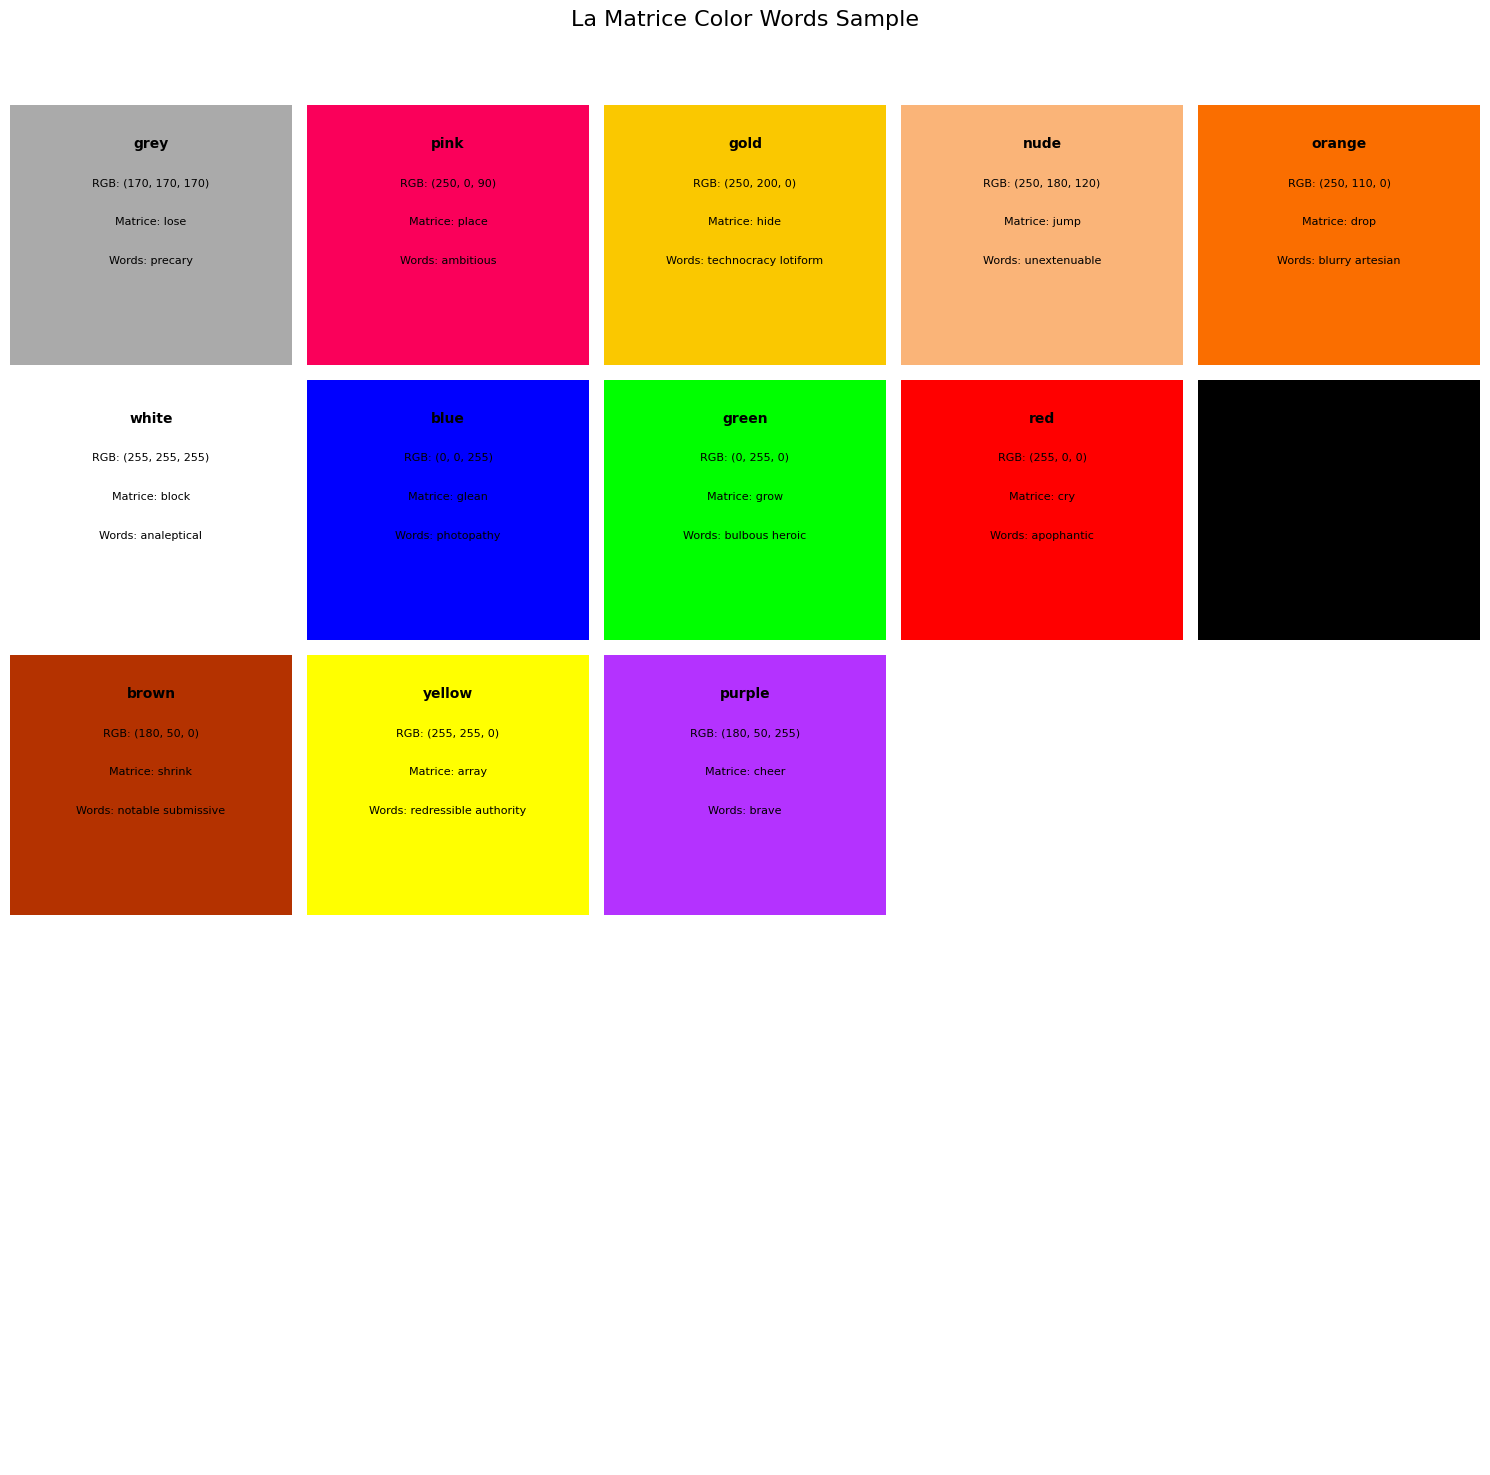


Creating RGB cube visualization...


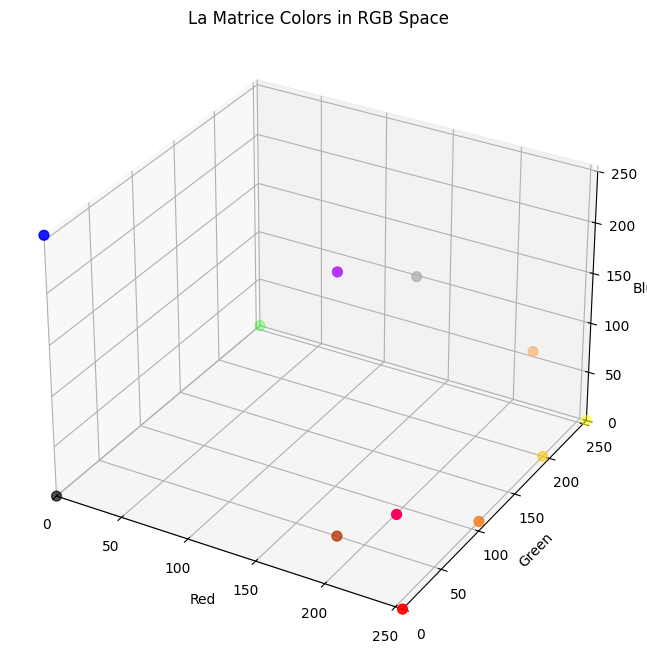


Sampling RGB space and finding closest colors...
Sampling RGB colorspace with step size 50...
Generated 216 sample points

Creating RGB samples visualization...


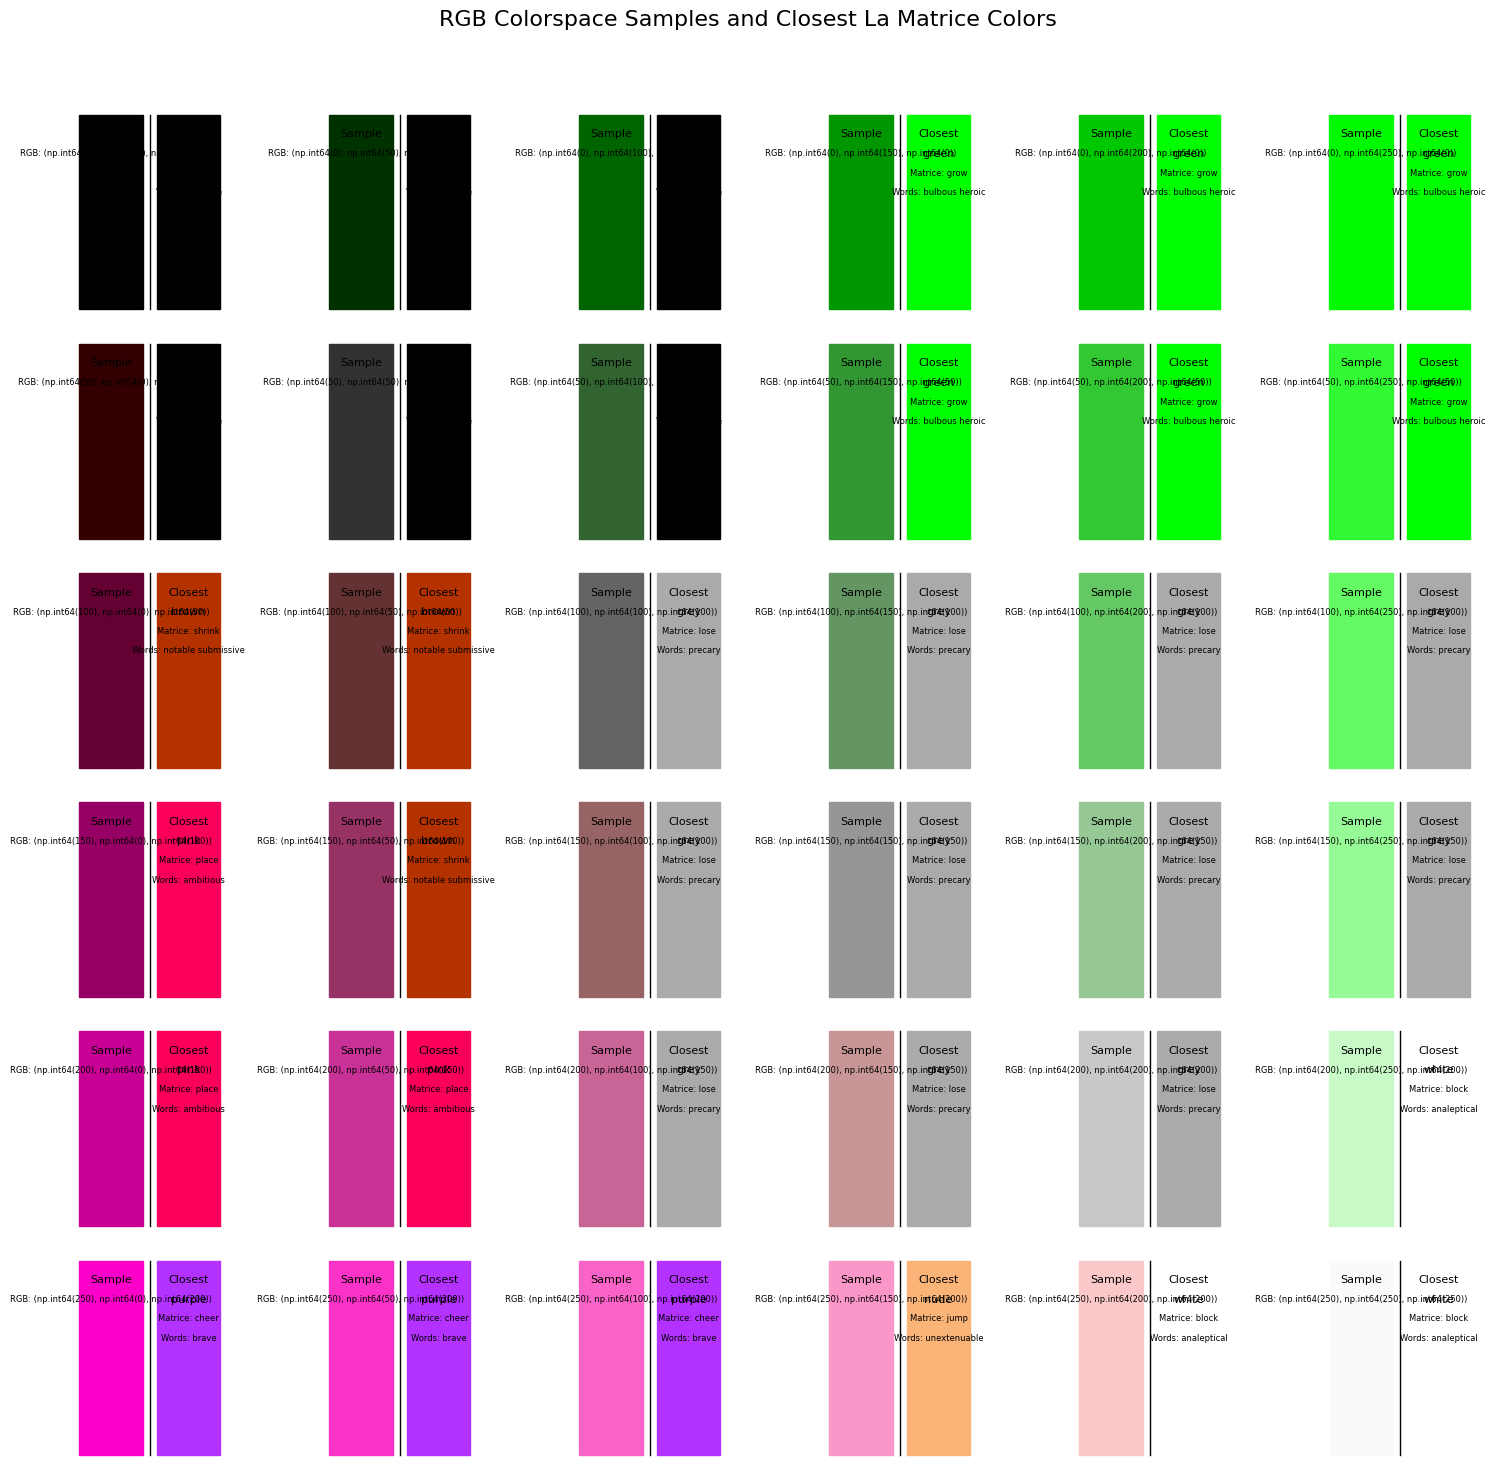

Visualizations complete!


In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
from urllib.parse import quote

def fetch_data():
    """Fetch data from URL and return as DataFrame."""
    # Define the URL in a way that avoids syntax errors
    base_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/"
    file_path = "la%20matrice-tAkQ2ShtbvUM4bx61GHVjOFgDYUcOQ.csv"
    url = base_url + file_path

    print(f"Fetching data from URL...")
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = StringIO(response.text)
            df = pd.read_csv(data)
            print("Data fetched successfully!")
            return df
        else:
            print(f"Failed to fetch data: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error fetching data: {e}")
        # If fetching fails, create a sample dataframe for demonstration
        return create_sample_dataframe()

def create_sample_dataframe():
    """Create a sample dataframe if fetching fails."""
    print("Creating sample dataframe...")

    # Define some sample colors with RGB values and words
    data = {
        'color': ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'black', 'white'],
        'r': [255, 0, 0, 255, 128, 255, 255, 165, 0, 255],
        'g': [0, 0, 255, 255, 0, 165, 192, 42, 0, 255],
        'b': [0, 255, 0, 0, 128, 0, 203, 42, 0, 255],
        'matrice': ['passion', 'calm', 'growth', 'joy', 'mystery', 'energy', 'love', 'earth', 'void', 'purity'],
        'english-words-code': ['anger', 'peace', 'nature', 'happiness', 'magic', 'warmth', 'gentle', 'solid', 'dark', 'clean']
    }

    return pd.DataFrame(data)

def create_color_grid(df, grid_size=5):
    """Create a grid visualization of colors from the dataset."""
    # Sample colors from the dataset
    if len(df) > grid_size * grid_size:
        sample_df = df.sample(grid_size * grid_size)
    else:
        sample_df = df

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.suptitle('La Matrice Color Words Sample', fontsize=16)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, (_, row) in enumerate(sample_df.iterrows()):
        if i >= len(axes):
            break

        # Get color information
        color_name = row['color']
        rgb = (int(row['r']), int(row['g']), int(row['b']))
        hex_color = '#{:02x}{:02x}{:02x}'.format(*rgb)

        # Get semantic words
        matrice = row['matrice'] if pd.notna(row['matrice']) else ""
        english_words = row['english-words-code'] if pd.notna(row['english-words-code']) else ""

        # Create color swatch
        axes[i].add_patch(plt.Rectangle((0, 0), 1, 1, color=hex_color))

        # Add text information
        axes[i].text(0.5, 0.85, color_name, ha='center', va='center', fontsize=10, fontweight='bold')
        axes[i].text(0.5, 0.7, f"RGB: {rgb}", ha='center', va='center', fontsize=8)

        # Add semantic words
        if matrice:
            axes[i].text(0.5, 0.55, f"Matrice: {matrice}", ha='center', va='center', fontsize=8)
        if english_words:
            axes[i].text(0.5, 0.4, f"Words: {english_words}", ha='center', va='center', fontsize=8)

        axes[i].axis('off')

    # Hide any unused subplots
    for i in range(len(sample_df), len(axes)):
        axes[i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for the suptitle
    return fig

def create_rgb_cube_visualization(df, sample_size=50):
    """Create a 3D visualization of colors in RGB space."""
    # Sample the dataframe if it's too large
    if len(df) > sample_size:
        sample_df = df.sample(sample_size)
    else:
        sample_df = df

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extract RGB values
    r_values = sample_df['r'].astype(int).values
    g_values = sample_df['g'].astype(int).values
    b_values = sample_df['b'].astype(int).values

    # Convert RGB to matplotlib colors
    colors = ['#{:02x}{:02x}{:02x}'.format(r, g, b) for r, g, b in zip(r_values, g_values, b_values)]

    # Plot points
    scatter = ax.scatter(r_values, g_values, b_values, c=colors, s=50)

    # Set labels and title
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('La Matrice Colors in RGB Space')

    # Set axis limits
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)

    return fig

def sample_rgb_space(step=50):
    """Sample the RGB colorspace at regular intervals."""
    print(f"Sampling RGB colorspace with step size {step}...")

    # Create a grid of RGB values
    r_values = np.arange(0, 256, step)
    g_values = np.arange(0, 256, step)
    b_values = np.arange(0, 256, step)

    # Create all combinations
    rgb_samples = []
    for r in r_values:
        for g in g_values:
            for b in b_values:
                rgb_samples.append((r, g, b))

    print(f"Generated {len(rgb_samples)} sample points")
    return rgb_samples

def find_closest_color(rgb_point, df):
    """Find the closest color in the dataset to the given RGB point."""
    min_distance = float('inf')
    closest_color = None

    for _, row in df.iterrows():
        color_rgb = (int(row['r']), int(row['g']), int(row['b']))

        # Calculate Euclidean distance in RGB space
        distance = np.sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(rgb_point, color_rgb)))

        if distance < min_distance:
            min_distance = distance
            closest_color = {
                'name': row['color'],
                'rgb': color_rgb,
                'distance': distance,
                'matrice': row['matrice'] if pd.notna(row['matrice']) else None,
                'english_words': row['english-words-code'] if pd.notna(row['english-words-code']) else None
            }

    return closest_color

def visualize_rgb_samples(rgb_samples, closest_colors, sample_size=36):
    """Create a grid visualization of sampled RGB points and their closest colors."""
    # Select a subset of samples to display
    if len(rgb_samples) > sample_size:
        indices = np.linspace(0, len(rgb_samples)-1, sample_size, dtype=int)
        selected_samples = [rgb_samples[i] for i in indices]
        selected_colors = [closest_colors[i] for i in indices]
    else:
        selected_samples = rgb_samples
        selected_colors = closest_colors

    # Calculate grid dimensions
    grid_size = int(np.ceil(np.sqrt(sample_size)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.suptitle('RGB Colorspace Samples and Closest La Matrice Colors', fontsize=16)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, (rgb_point, color_info) in enumerate(zip(selected_samples, selected_colors)):
        if i >= len(axes):
            break

        # Create color swatch for the RGB sample
        sample_hex = '#{:02x}{:02x}{:02x}'.format(*rgb_point)
        axes[i].add_patch(plt.Rectangle((0, 0), 0.45, 1, color=sample_hex))

        # Create color swatch for the closest color
        closest_hex = '#{:02x}{:02x}{:02x}'.format(*color_info['rgb'])
        axes[i].add_patch(plt.Rectangle((0.55, 0), 0.45, 1, color=closest_hex))

        # Add dividing line
        axes[i].plot([0.5, 0.5], [0, 1], 'k-', linewidth=1)

        # Add text information
        axes[i].text(0.225, 0.9, "Sample", ha='center', va='center', fontsize=8)
        axes[i].text(0.775, 0.9, "Closest", ha='center', va='center', fontsize=8)

        axes[i].text(0.225, 0.8, f"RGB: {rgb_point}", ha='center', va='center', fontsize=6)
        axes[i].text(0.775, 0.8, color_info['name'], ha='center', va='center', fontsize=8)

        # Add semantic words for the closest color
        y_pos = 0.7
        if color_info['matrice']:
            axes[i].text(0.775, y_pos, f"Matrice: {color_info['matrice']}", ha='center', va='center', fontsize=6)
            y_pos -= 0.1
        if color_info['english_words']:
            axes[i].text(0.775, y_pos, f"Words: {color_info['english_words']}", ha='center', va='center', fontsize=6)

        axes[i].axis('off')

    # Hide any unused subplots
    for i in range(len(selected_samples), len(axes)):
        axes[i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for the suptitle
    return fig

def main():
    # Fetch the data
    df = fetch_data()

    if df is not None:
        # Print dataset information
        print("\nDataset Overview:")
        print(f"Number of colors in dataset: {len(df)}")
        print(f"Columns: {', '.join(df.columns)}")

        # Create color grid visualization
        print("\nCreating color grid visualization...")
        fig_grid = create_color_grid(df)
        plt.figure(fig_grid.number)
        plt.show()

        # Create RGB cube visualization
        print("\nCreating RGB cube visualization...")
        fig_cube = create_rgb_cube_visualization(df)
        plt.figure(fig_cube.number)
        plt.show()

        # Sample RGB space and find closest colors
        print("\nSampling RGB space and finding closest colors...")
        rgb_samples = sample_rgb_space(step=50)
        closest_colors = [find_closest_color(rgb_point, df) for rgb_point in rgb_samples]

        # Create RGB samples visualization
        print("\nCreating RGB samples visualization...")
        fig_samples = visualize_rgb_samples(rgb_samples, closest_colors)
        plt.figure(fig_samples.number)
        plt.show()

        print("Visualizations complete!")
    else:
        print("Failed to load data. Exiting.")

if __name__ == "__main__":
    main()

In [ ]:
!pip install gensim.models

ERROR: Could not find a version that satisfies the requirement gensim.models (from versions: none)
ERROR: No matching distribution found for gensim.models


In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import math
import re
import time
import nltk
from nltk.corpus import wordnet

# Download required NLTK data
print("Downloading NLTK data...")
nltk.download('wordnet')
nltk.download('omw-1.4')
print("NLTK data downloaded successfully!")

def fetch_data():
    """Fetch data from URL and return as DataFrame."""
    # Define the URL in a way that avoids syntax errors
    base_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/"
    file_path = "la%20matrice-tAkQ2ShtbvUM4bx61GHVjOFgDYUcOQ.csv"
    url = base_url + file_path

    print(f"Fetching data from URL...")
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = StringIO(response.text)
            df = pd.read_csv(data)
            print("Data fetched successfully!")
            return df
        else:
            print(f"Failed to fetch data: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def rgb_distance(color1, color2):
    """Calculate Euclidean distance between two RGB colors."""
    return math.sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(color1, color2)))

def extract_words_from_dataset(df):
    """Extract all unique words from the dataset."""
    all_words = set()

    # Columns containing words
    word_columns = ['matrice1', 'matrice', 'english-words', 'english-words-code']

    for _, row in df.iterrows():
        for col in word_columns:
            if pd.notna(row[col]) and row[col]:
                # Split text into words and clean them
                words = re.findall(r'\b\w+\b', str(row[col]).lower())
                all_words.update([w for w in words if len(w) > 2])

    return list(all_words)

def find_closest_color(rgb_point, df):
    """Find the closest color in the dataset to the given RGB point."""
    min_distance = float('inf')
    closest_color = None

    for _, row in df.iterrows():
        color_rgb = (int(row['r']), int(row['g']), int(row['b']))
        distance = rgb_distance(rgb_point, color_rgb)

        if distance < min_distance:
            min_distance = distance

            # Extract words from relevant columns
            words = []
            for col in ['matrice', 'matrice1', 'english-words', 'english-words-code']:
                if pd.notna(row[col]) and row[col]:
                    # Extract words and clean them
                    col_words = re.findall(r'\b\w+\b', str(row[col]).lower())
                    words.extend([w for w in col_words if len(w) > 2])

            closest_color = {
                'name': row['color'],
                'rgb': color_rgb,
                'distance': distance,
                'words': list(set(words)),
                'hex': '#{:02x}{:02x}{:02x}'.format(int(row['r']), int(row['g']), int(row['b']))
            }

    return closest_color

def find_semantically_similar_words(word, existing_words, top_n=5):
    """Find semantically similar words using WordNet."""
    similar_words = []

    # Get synsets for the word
    synsets = wordnet.synsets(word)

    # If no synsets found, return empty list
    if not synsets:
        return []

    # Get lemmas from all synsets
    all_lemmas = []
    for synset in synsets:
        all_lemmas.extend(synset.lemmas())

    # Get similar words from lemmas
    for lemma in all_lemmas:
        similar_word = lemma.name().lower().replace('_', ' ')
        if similar_word not in existing_words and similar_word not in similar_words:
            similar_words.append(similar_word)

    # Get hypernyms and hyponyms
    for synset in synsets[:2]:  # Limit to first 2 synsets to avoid too many words
        for hypernym in synset.hypernyms():
            for lemma in hypernym.lemmas():
                similar_word = lemma.name().lower().replace('_', ' ')
                if similar_word not in existing_words and similar_word not in similar_words:
                    similar_words.append(similar_word)

        for hyponym in synset.hyponyms():
            for lemma in hyponym.lemmas():
                similar_word = lemma.name().lower().replace('_', ' ')
                if similar_word not in existing_words and similar_word not in similar_words:
                    similar_words.append(similar_word)

    # Return top N similar words
    return similar_words[:top_n]

def generate_new_words_for_rgb(rgb_point, df, all_dataset_words):
    """Generate new words for an RGB point using semantic analysis."""
    # Find closest color in the dataset
    closest_color = find_closest_color(rgb_point, df)

    # Get words associated with the closest color
    color_words = closest_color['words']

    # Generate new words using semantic similarity
    new_words = []

    for word in color_words:
        similar_words = find_semantically_similar_words(word, all_dataset_words)
        new_words.extend(similar_words)

    # Remove duplicates and limit to top 10
    unique_new_words = list(dict.fromkeys(new_words))[:10]

    return {
        'rgb': rgb_point,
        'closest_color': closest_color['name'],
        'closest_color_rgb': closest_color['rgb'],
        'distance': closest_color['distance'],
        'original_words': color_words,
        'new_words': unique_new_words
    }

def sample_rgb_space(step=50):
    """Sample the RGB colorspace at regular intervals."""
    print(f"Sampling RGB colorspace with step size {step}...")

    # Create a grid of RGB values
    r_values = np.arange(0, 256, step)
    g_values = np.arange(0, 256, step)
    b_values = np.arange(0, 256, step)

    # Create all combinations
    rgb_samples = []
    for r in r_values:
        for g in g_values:
            for b in b_values:
                rgb_samples.append((r, g, b))

    print(f"Generated {len(rgb_samples)} sample points")
    return rgb_samples

def create_semantic_rgb_table(rgb_results):
    """Create a table of RGB values and their semantically generated words."""
    # Create a DataFrame to hold the results
    results = []

    for result in rgb_results:
        original_words = ", ".join(result['original_words']) if result['original_words'] else ""
        new_words = ", ".join(result['new_words']) if result['new_words'] else ""

        results.append({
            'R': result['rgb'][0],
            'G': result['rgb'][1],
            'B': result['rgb'][2],
            'RGB': f"({result['rgb'][0]}, {result['rgb'][1]}, {result['rgb'][2]})",
            'Closest Color': result['closest_color'],
            'Closest RGB': f"({result['closest_color_rgb'][0]}, {result['closest_color_rgb'][1]}, {result['closest_color_rgb'][2]})",
            'Distance': f"{result['distance']:.1f}",
            'Original Words': original_words,
            'New Words': new_words
        })

    # Create DataFrame
    results_df = pd.DataFrame(results)

    # Save to CSV
    results_df.to_csv('semantic_rgb_mapping.csv', index=False)
    print("Saved semantic RGB mapping to semantic_rgb_mapping.csv")

    return results_df

def main():
    # Fetch the data
    df = fetch_data()

    if df is not None:
        # Print dataset information
        print("\nDataset Overview:")
        print(f"Number of colors in dataset: {len(df)}")
        print(f"Columns: {', '.join(df.columns)}")

        # Extract all words from the dataset
        print("\nExtracting words from dataset...")
        all_dataset_words = extract_words_from_dataset(df)
        print(f"Extracted {len(all_dataset_words)} unique words from dataset")

        # Sample RGB space
        step_size = 50
        rgb_samples = sample_rgb_space(step=step_size)

        # Generate new words for each RGB point
        print(f"\nGenerating new words for {len(rgb_samples)} RGB points...")
        start_time = time.time()

        rgb_results = []
        for i, rgb in enumerate(rgb_samples):
            if i % 10 == 0:
                print(f"Processing point {i+1}/{len(rgb_samples)}...")

            result = generate_new_words_for_rgb(rgb, df, all_dataset_words)
            rgb_results.append(result)

        print(f"Generated words in {time.time() - start_time:.2f} seconds")

        # Create semantic RGB table
        print("\nCreating semantic RGB table...")
        results_df = create_semantic_rgb_table(rgb_results)

        # Print sample of results
        print("\nSample of semantic RGB mapping (first 10 rows):")
        pd.set_option('display.max_colwidth', 50)
        print(results_df[['RGB', 'Closest Color', 'Original Words', 'New Words']].head(10))

        # Print some specific RGB coordinates
        print("\nSample RGB coordinates and their new words:")
        for r in [0, 100, 200]:
            for g in [0, 100, 200]:
                for b in [0, 100, 200]:
                    if r == g == b:  # Only print grayscale values for brevity
                        sample = results_df[(results_df['R'] == r) &
                                           (results_df['G'] == g) &
                                           (results_df['B'] == b)]
                        if not sample.empty:
                            print(f"RGB({r},{g},{b}): {sample.iloc[0]['New Words']}")

        print("\nSemantic mapping complete! Full results saved to semantic_rgb_mapping.csv")
    else:
        print("Failed to load data. Exiting.")

if __name__ == "__main__":
    main()

NLTK data downloaded successfully!
Fetching data from URL...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Data fetched successfully!

Dataset Overview:
Number of colors in dataset: 13
Columns: color, r, g, b, matrice1, matrice, english-words, english-words-code

Extracting words from dataset...
Extracted 75 unique words from dataset
Sampling RGB colorspace with step size 50...
Generated 216 sample points

Generating new words for 216 RGB points...
Processing point 1/216...
Processing point 11/216...
Processing point 21/216...
Processing point 31/216...
Processing point 41/216...
Processing point 51/216...
Processing point 61/216...
Processing point 71/216...
Processing point 81/216...
Processing point 91/216...
Processing point 101/216...
Processing point 111/216...
Processing point 121/216...
Processing point 131/216...
Processing point 141/216...
Processing point 151/216...
Processing point 161/216...
Processing point 171/216...
Processing point 181/216...
Processing point 191/216...
Processing point 201/216...
Processing point 211/216...
Generated words in 3.87 seconds

Creating semanti

In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import math
import re
import random
import time

def fetch_data():
    """Fetch data from URL and return as DataFrame."""
    base_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/"
    file_path = "la%20matrice-tAkQ2ShtbvUM4bx61GHVjOFgDYUcOQ.csv"
    url = base_url + file_path

    print(f"Fetching data from URL...")
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = StringIO(response.text)
            df = pd.read_csv(data)
            print("Data fetched successfully!")
            return df
        else:
            print(f"Failed to fetch data: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def rgb_distance(color1, color2):
    """Calculate Euclidean distance between two RGB colors."""
    return math.sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(color1, color2)))

def extract_words_from_dataset(df):
    """Extract all unique words from the dataset."""
    all_words = set()

    # Columns containing words
    word_columns = ['matrice1', 'matrice', 'english-words', 'english-words-code']

    for _, row in df.iterrows():
        for col in word_columns:
            if pd.notna(row[col]) and row[col]:
                # Split text into words and clean them
                words = re.findall(r'\b\w+\b', str(row[col]).lower())
                all_words.update([w for w in words if len(w) > 2])

    return list(all_words)

def find_closest_colors(rgb_point, df, top_n=3):
    """Find the closest colors in the dataset to the given RGB point."""
    distances = []

    for _, row in df.iterrows():
        color_rgb = (int(row['r']), int(row['g']), int(row['b']))
        distance = rgb_distance(rgb_point, color_rgb)

        # Extract words from relevant columns
        words = []
        for col in ['matrice', 'matrice1', 'english-words', 'english-words-code']:
            if pd.notna(row[col]) and row[col]:
                # Extract words and clean them
                col_words = re.findall(r'\b\w+\b', str(row[col]).lower())
                words.extend([w for w in col_words if len(w) > 2])

        distances.append({
            'name': row['color'],
            'rgb': color_rgb,
            'distance': distance,
            'words': list(set(words)),
            'hex': '#{:02x}{:02x}{:02x}'.format(int(row['r']), int(row['g']), int(row['b']))
        })

    # Sort by distance and return top N
    closest_colors = sorted(distances, key=lambda x: x['distance'])[:top_n]
    return closest_colors

def find_similar_words(word, all_words, max_results=5):
    """Find similar words based on various patterns."""
    similar_words = []

    # Method 1: Prefix matching
    if len(word) >= 3:
        prefix = word[:2]
        prefix_matches = [w for w in all_words if w.startswith(prefix) and w != word]
        similar_words.extend(prefix_matches[:2])

    # Method 2: Suffix matching
    if len(word) >= 3:
        suffix = word[-2:]
        suffix_matches = [w for w in all_words if w.endswith(suffix) and w != word]
        similar_words.extend(suffix_matches[:2])

    # Method 3: Length similarity
    if len(similar_words) < max_results:
        word_length = len(word)
        length_matches = [w for w in all_words if abs(len(w) - word_length) <= 1
                         and w != word and w not in similar_words]
        similar_words.extend(length_matches[:max_results - len(similar_words)])

    # Method 4: Random selection if we still don't have enough
    if len(similar_words) < max_results:
        remaining = [w for w in all_words if w != word and w not in similar_words]
        random.shuffle(remaining)
        similar_words.extend(remaining[:max_results - len(similar_words)])

    # Remove duplicates and limit to max_results
    return list(dict.fromkeys(similar_words))[:max_results]

def sample_rgb_space(step=50):
    """Sample the RGB colorspace at regular intervals."""
    print(f"Sampling RGB colorspace with step size {step}...")

    # Create a grid of RGB values
    r_values = np.arange(0, 256, step)
    g_values = np.arange(0, 256, step)
    b_values = np.arange(0, 256, step)

    # Create all combinations
    rgb_samples = []
    for r in r_values:
        for g in g_values:
            for b in b_values:
                rgb_samples.append((r, g, b))

    print(f"Generated {len(rgb_samples)} sample points")
    return rgb_samples

def create_rgb_color_words_csv(df, all_dataset_words, step=50):
    """Create a CSV with color words for each 50-unit coordinate in RGB space."""
    print(f"Creating RGB color words CSV with step size {step}...")

    # Sample RGB space
    rgb_samples = sample_rgb_space(step=step)

    # Create a list to hold the results
    results = []

    # Process each RGB point
    for i, rgb in enumerate(rgb_samples):
        if i % 20 == 0:
            print(f"Processing point {i+1}/{len(rgb_samples)}...")

        # Find closest colors
        closest_colors = find_closest_colors(rgb, df, top_n=3)

        # Get all words from closest colors
        all_color_words = []
        for color in closest_colors:
            all_color_words.extend(color['words'])

        # Remove duplicates
        color_words = list(dict.fromkeys(all_color_words))

        # Generate new words
        new_words = []
        for word in color_words[:5]:  # Limit to first 5 words to avoid too many
            similar = find_similar_words(word, all_dataset_words)
            new_words.extend(similar)

        # Remove duplicates and words already in color_words
        unique_new_words = [w for w in list(dict.fromkeys(new_words)) if w not in color_words][:10]

        # Create result entry
        results.append({
            'R': rgb[0],
            'G': rgb[1],
            'B': rgb[2],
            'RGB': f"({rgb[0]}, {rgb[1]}, {rgb[2]})",
            'Hex': '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2]),
            'Closest_Color': closest_colors[0]['name'],
            'Original_Words': ', '.join(color_words),
            'New_Words': ', '.join(unique_new_words)
        })

    # Create DataFrame
    results_df = pd.DataFrame(results)

    # Save to CSV
    csv_filename = 'rgb_color_words_50.csv'
    results_df.to_csv(csv_filename, index=False)
    print(f"\nSaved RGB color words to {csv_filename}")

    return results_df

def main():
    # Fetch the data
    df = fetch_data()

    if df is not None:
        # Print dataset information
        print("\nDataset Overview:")
        print(f"Number of colors in dataset: {len(df)}")
        print(f"Columns: {', '.join(df.columns)}")

        # Extract all words from the dataset
        print("\nExtracting words from dataset...")
        all_dataset_words = extract_words_from_dataset(df)
        print(f"Extracted {len(all_dataset_words)} unique words from dataset")

        # Create RGB color words CSV
        start_time = time.time()
        results_df = create_rgb_color_words_csv(df, all_dataset_words, step=50)
        print(f"Generated RGB color words CSV in {time.time() - start_time:.2f} seconds")

        # Print sample of results
        print("\nSample of RGB color words (first 10 rows):")
        pd.set_option('display.max_colwidth', 50)
        print(results_df[['RGB', 'Closest_Color', 'Original_Words', 'New_Words']].head(10))

        # Print some specific RGB coordinates
        print("\nSample RGB coordinates and their words:")
        for r in [0, 100, 200]:
            for g in [0, 100, 200]:
                for b in [0, 100, 200]:
                    if r == g == b:  # Only print grayscale values for brevity
                        sample = results_df[(results_df['R'] == r) &
                                           (results_df['G'] == g) &
                                           (results_df['B'] == b)]
                        if not sample.empty:
                            print(f"RGB({r},{g},{b}):")
                            print(f"  Original Words: {sample.iloc[0]['Original_Words']}")
                            print(f"  New Words: {sample.iloc[0]['New_Words']}")

        print("\nRGB color words CSV generation complete!")
    else:
        print("Failed to load data. Exiting.")

if __name__ == "__main__":
    main()

Fetching data from URL...
Data fetched successfully!

Dataset Overview:
Number of colors in dataset: 13
Columns: color, r, g, b, matrice1, matrice, english-words, english-words-code

Extracting words from dataset...
Extracted 75 unique words from dataset
Creating RGB color words CSV with step size 50...
Sampling RGB colorspace with step size 50...
Generated 216 sample points
Processing point 1/216...
Processing point 21/216...
Processing point 41/216...
Processing point 61/216...
Processing point 81/216...
Processing point 101/216...
Processing point 121/216...
Processing point 141/216...
Processing point 161/216...
Processing point 181/216...
Processing point 201/216...

Saved RGB color words to rgb_color_words_50.csv
Generated RGB color words CSV in 0.39 seconds

Sample of RGB color words (first 10 rows):
            RGB Closest_Color  \
0     (0, 0, 0)         black   
1    (0, 0, 50)         black   
2   (0, 0, 100)         black   
3   (0, 0, 150)          blue   
4   (0, 0, 200) 

Loading English dictionary...
Loaded 234377 words from English dictionary
Fetching data from URL: https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-h61ZapfAQib2wQhF5WKfnkR54rcbBF.csv
Data fetched successfully!
Processing data...
Processed 216 RGB points
Created mappings for 205 words from dataset
Total unique words in dataset: 205

===== Dictionary Word-to-Color Explorer =====
1. Search for any word (dictionary-based)
2. Search dictionary
3. Visualize word colors
4. Exit

Enter your choice (1-4): 1
Enter any word to find its colors: scared
Note: 'scared' is not in the English dictionary
Word 'scared' not found directly. Using similar words: scale, scurf, scale leaf...

Colors for word 'scared':
  RGB: (0, 0, 0), Type: original
  RGB: (0, 0, 50), Type: original
  RGB: (0, 0, 100), Type: original
  RGB: (0, 50, 0), Type: original
  RGB: (0, 50, 50), Type: original
Visualize these colors? (y/n): y
Note: 'scared' is not in the English dictionary
Word 'scared' not

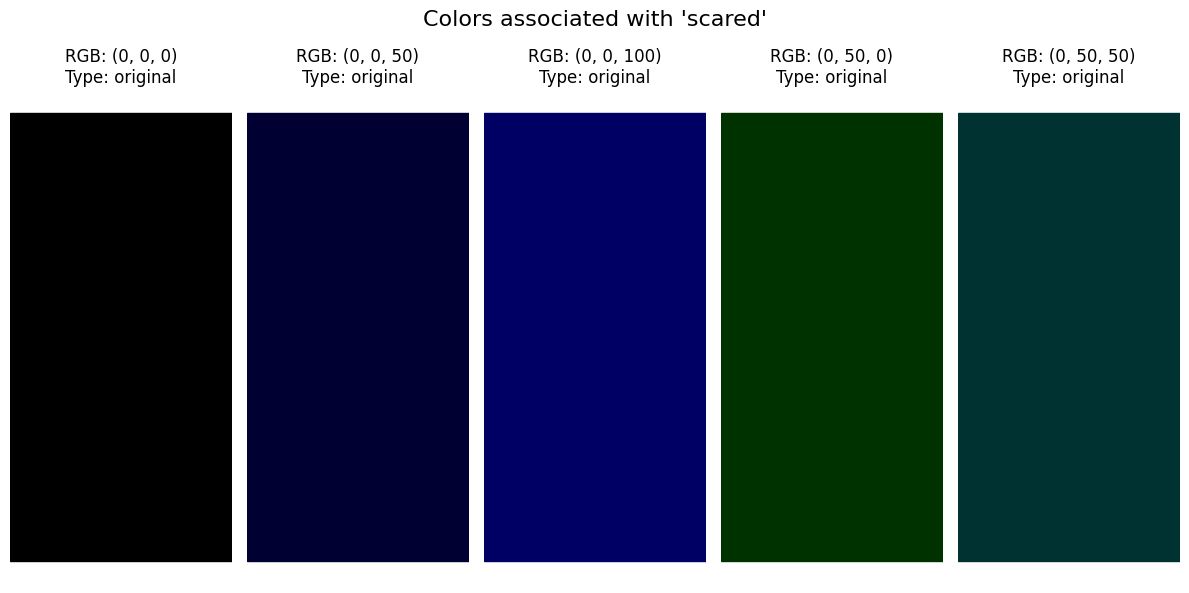


===== Dictionary Word-to-Color Explorer =====
1. Search for any word (dictionary-based)
2. Search dictionary
3. Visualize word colors
4. Exit


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import nltk
from nltk.corpus import words as nltk_words

class DictionaryWordColorMapper:
    def __init__(self, csv_url):
        """Initialize the dictionary-based word-to-color mapper."""
        self.csv_url = csv_url
        self.df = None
        self.word_to_colors = {}
        self.color_to_words = {}
        self.all_dataset_words = set()
        self.dictionary = set()

        # Load dictionary and data
        self._load_dictionary()
        self._load_data()

    def _load_dictionary(self):
        """Load a comprehensive English dictionary."""
        print("Loading English dictionary...")
        try:
            # Download NLTK data if not already present
            nltk.download('words', quiet=True)

            # Get all English words from NLTK
            self.dictionary = set(w.lower() for w in nltk_words.words())
            print(f"Loaded {len(self.dictionary)} words from English dictionary")
        except Exception as e:
            print(f"Error loading dictionary: {e}")
            # Fallback to a smaller set of common words
            common_words = [
                "red", "green", "blue", "yellow", "orange", "purple", "pink", "brown", "black", "white",
                "gray", "bright", "dark", "light", "vivid", "pale", "deep", "soft", "hard", "warm", "cool",
                "hot", "cold", "fire", "water", "earth", "air", "sun", "moon", "star", "sky", "cloud",
                "rain", "snow", "wind", "storm", "calm", "peace", "war", "love", "hate", "joy", "sorrow",
                "happy", "sad", "angry", "fear", "hope", "dream", "wish", "think", "feel", "see", "hear",
                "touch", "taste", "smell", "good", "bad", "big", "small", "tall", "short", "long", "wide",
                "narrow", "thick", "thin", "heavy", "light", "fast", "slow", "old", "new", "young", "ancient",
                "modern", "future", "past", "present", "time", "space", "place", "home", "work", "play",
                "food", "drink", "eat", "sleep", "wake", "life", "death", "birth", "grow", "change", "stay",
                "move", "run", "walk", "jump", "fly", "swim", "climb", "fall", "rise", "begin", "end"
            ]
            self.dictionary = set(common_words)
            print(f"Loaded {len(self.dictionary)} common words as fallback dictionary")

    def _load_data(self):
        """Load the data from the CSV URL."""
        print(f"Fetching data from URL: {self.csv_url}")
        try:
            response = requests.get(self.csv_url)
            if response.status_code == 200:
                data = StringIO(response.text)
                self.df = pd.read_csv(data)
                print("Data fetched successfully!")
                self._process_data()
            else:
                print(f"Failed to fetch data: {response.status_code}")
        except Exception as e:
            print(f"Error fetching data: {e}")

    def _process_data(self):
        """Process the loaded data to create mappings."""
        if self.df is None:
            print("No data to process.")
            return

        print("Processing data...")

        # Create mappings
        self.word_to_colors = defaultdict(list)
        self.color_to_words = defaultdict(list)

        # Process each row in the dataframe
        for _, row in self.df.iterrows():
            rgb = (row['R'], row['G'], row['B'])
            rgb_str = row['RGB']

            # Process original words
            if pd.notna(row['Original Words']):
                original_words = [w.strip() for w in str(row['Original Words']).split(',')]
                for word in original_words:
                    if word:  # Skip empty strings
                        word = word.lower()
                        self.all_dataset_words.add(word)
                        self.word_to_colors[word].append({
                            'rgb': rgb,
                            'rgb_str': rgb_str,
                            'type': 'original'
                        })
                        self.color_to_words[rgb_str].append({
                            'word': word,
                            'type': 'original'
                        })

            # Process new words
            if pd.notna(row['New Words']):
                new_words = [w.strip() for w in str(row['New Words']).split(',')]
                for word in new_words:
                    if word:  # Skip empty strings
                        word = word.lower()
                        self.all_dataset_words.add(word)
                        self.word_to_colors[word].append({
                            'rgb': rgb,
                            'rgb_str': rgb_str,
                            'type': 'new'
                        })
                        self.color_to_words[rgb_str].append({
                            'word': word,
                            'type': 'new'
                        })

        print(f"Processed {len(self.df)} RGB points")
        print(f"Created mappings for {len(self.word_to_colors)} words from dataset")
        print(f"Total unique words in dataset: {len(self.all_dataset_words)}")

    def find_similar_words(self, word, limit=5):
        """Find words in the dataset similar to the given word."""
        word = word.lower()

        if not self.all_dataset_words:
            return []

        # Calculate similarity scores for all words in the dataset
        word_scores = []
        for dataset_word in self.all_dataset_words:
            # Calculate various similarity metrics

            # 1. Prefix matching
            prefix_score = 0
            min_len = min(len(word), len(dataset_word))
            for i in range(min_len):
                if word[i] == dataset_word[i]:
                    prefix_score += 1
                else:
                    break
            prefix_score = prefix_score / max(len(word), len(dataset_word))

            # 2. Suffix matching
            suffix_score = 0
            for i in range(1, min_len + 1):
                if word[-i] == dataset_word[-i]:
                    suffix_score += 1
                else:
                    break
            suffix_score = suffix_score / max(len(word), len(dataset_word))

            # 3. Character overlap
            word_chars = set(word)
            dataset_word_chars = set(dataset_word)
            overlap_score = len(word_chars.intersection(dataset_word_chars)) / len(word_chars.union(dataset_word_chars))

            # 4. Edit distance (normalized)
            edit_distance = self._edit_distance(word, dataset_word)
            max_len = max(len(word), len(dataset_word))
            edit_score = 1 - (edit_distance / max_len)

            # Combine scores (weighted)
            combined_score = (
                prefix_score * 0.3 +
                suffix_score * 0.2 +
                overlap_score * 0.2 +
                edit_score * 0.3
            )

            word_scores.append((dataset_word, combined_score))

        # Sort by score (descending)
        word_scores.sort(key=lambda x: x[1], reverse=True)

        # Return top matches
        return [w for w, _ in word_scores[:limit]]

    def _edit_distance(self, s1, s2):
        """Calculate the Levenshtein edit distance between two strings."""
        if len(s1) < len(s2):
            return self._edit_distance(s2, s1)

        if len(s2) == 0:
            return len(s1)

        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row

        return previous_row[-1]

    def get_colors_for_word(self, word, limit=5):
        """Get colors for any word, even if not in the dataset."""
        word = word.lower()

        # Check if the word is in our dictionary
        if word not in self.dictionary and len(word) > 2:
            print(f"Note: '{word}' is not in the English dictionary")

        # Case 1: Word is directly in our dataset
        if word in self.word_to_colors:
            return self.word_to_colors[word][:limit]

        # Case 2: Word is not in our dataset, find similar words
        similar_words = self.find_similar_words(word, limit=10)

        if not similar_words:
            print(f"No similar words found for '{word}'")
            return []

        print(f"Word '{word}' not found directly. Using similar words: {', '.join(similar_words[:3])}...")

        # Collect colors from similar words
        colors = []
        for similar_word in similar_words:
            if similar_word in self.word_to_colors:
                colors.extend(self.word_to_colors[similar_word])
                if len(colors) >= limit:
                    break

        return colors[:limit]

    def search_dictionary(self, query, limit=10):
        """Search the dictionary for words containing the query string."""
        query = query.lower()
        matching_words = [word for word in self.dictionary if query in word]

        # Sort by length (shorter words first)
        matching_words.sort(key=len)

        return matching_words[:limit]

    def visualize_word_colors(self, word):
        """Visualize the colors associated with a word."""
        colors = self.get_colors_for_word(word)

        if not colors:
            print(f"No colors to visualize for word: {word}")
            return

        plt.figure(figsize=(12, 6))

        # Create color swatches
        for i, color_info in enumerate(colors):
            rgb = color_info['rgb']
            normalized_rgb = (rgb[0]/255, rgb[1]/255, rgb[2]/255)

            plt.subplot(1, len(colors), i+1)
            plt.axhspan(0, 1, color=normalized_rgb)
            plt.title(f"RGB: {color_info['rgb_str']}\nType: {color_info['type']}")
            plt.axis('off')

        plt.suptitle(f"Colors associated with '{word}'", fontsize=16)
        plt.tight_layout()
        plt.show()

    def run_interactive_explorer(self):
        """Run an interactive explorer for the dictionary-based word-to-color mapper."""
        while True:
            print("\n===== Dictionary Word-to-Color Explorer =====")
            print("1. Search for any word (dictionary-based)")
            print("2. Search dictionary")
            print("3. Visualize word colors")
            print("4. Exit")

            choice = input("\nEnter your choice (1-4): ")

            if choice == '1':
                word = input("Enter any word to find its colors: ")
                colors = self.get_colors_for_word(word)

                if colors:
                    print(f"\nColors for word '{word}':")
                    for color in colors:
                        print(f"  RGB: {color['rgb_str']}, Type: {color['type']}")

                    visualize = input("Visualize these colors? (y/n): ")
                    if visualize.lower() == 'y':
                        self.visualize_word_colors(word)

            elif choice == '2':
                query = input("Enter a search term for the dictionary: ")
                matching_words = self.search_dictionary(query)

                if matching_words:
                    print(f"\nFound {len(matching_words)} matching words in dictionary:")
                    for i, word in enumerate(matching_words):
                        print(f"  {i+1}. {word}")

                    word_idx = input("\nEnter the number of a word to see its colors (or press Enter to skip): ")
                    if word_idx.isdigit() and 1 <= int(word_idx) <= len(matching_words):
                        selected_word = matching_words[int(word_idx) - 1]
                        self.get_colors_for_word(selected_word)
                else:
                    print(f"No dictionary words found containing '{query}'.")

            elif choice == '3':
                word = input("Enter a word to visualize its colors: ")
                self.visualize_word_colors(word)

            elif choice == '4':
                print("Exiting...")
                break

            else:
                print("Invalid choice. Please try again.")

# Example usage
def main():
    # URL to the CSV file
    csv_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-h61ZapfAQib2wQhF5WKfnkR54rcbBF.csv"

    # Create the dictionary-based mapper
    mapper = DictionaryWordColorMapper(csv_url)

    # Run the interactive explorer
    mapper.run_interactive_explorer()

if __name__ == "__main__":
    main()

In [ ]:
!pip install english_words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 88.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for english_words: filename=english_words-2.0.1-py3-none-any.whl size=8196319 sha256=56f0d66b4b2cceb37f6dbef4248ff0b7f748420a7bf8973669def921b9c159b5
  Stored in directory: /root/.cache/pip/wheels/ed/f6/a3/af2d351a6b2ed2cd453123e85b86c29203cac1a982f1b06d76
Successfully built english_words


Loading English dictionary from english-words package...
Loaded 234450 words from English dictionary
Loading data from https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-h61ZapfAQib2wQhF5WKfnkR54rcbBF.csv...
Data loaded successfully!
Processed 216 RGB points
Created mappings for 205 words
Total unique words: 205

===== Minimal English Words Mapper =====
Type any word to see its colors
Type 'exit' to quit
Word 'adequate' not found directly. Using similar words: undertreated, stead, acquire...

Colors for word 'adequate':
  RGB: (0, 0, 0), Type: original
  RGB: (0, 0, 50), Type: original
  RGB: (0, 0, 100), Type: original
  RGB: (0, 50, 0), Type: original
  RGB: (0, 50, 50), Type: original


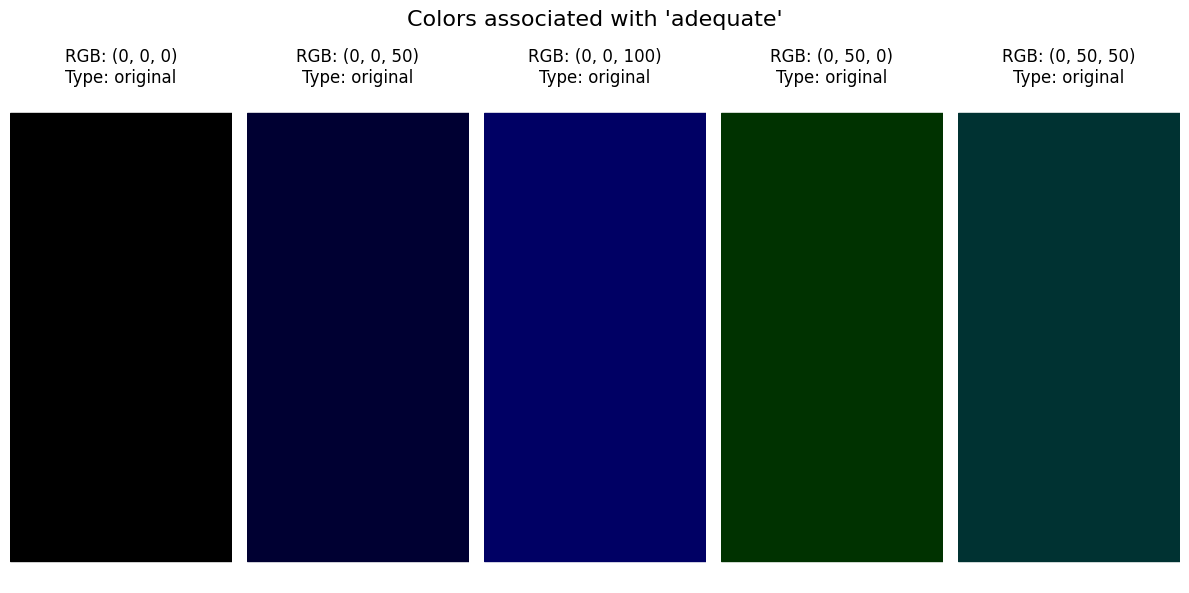

In [ ]:

import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
from english_words import get_english_words_set

def load_data(csv_url):
    """Load data from CSV URL and create word-to-color mapping."""
    print(f"Loading data from {csv_url}...")

    try:
        response = requests.get(csv_url)
        if response.status_code == 200:
            data = StringIO(response.text)
            df = pd.read_csv(data)
            print("Data loaded successfully!")

            # Create word-to-color mapping
            word_to_colors = {}
            all_words = set()

            # Process each row
            for _, row in df.iterrows():
                rgb = (row['R'], row['G'], row['B'])
                rgb_str = row['RGB']

                # Process original words
                if pd.notna(row['Original Words']):
                    original_words = [w.strip().lower() for w in str(row['Original Words']).split(',')]
                    for word in original_words:
                        if word:  # Skip empty strings
                            all_words.add(word)
                            if word not in word_to_colors:
                                word_to_colors[word] = []
                            word_to_colors[word].append({
                                'rgb': rgb,
                                'rgb_str': rgb_str,
                                'type': 'original'
                            })

                # Process new words
                if pd.notna(row['New Words']):
                    new_words = [w.strip().lower() for w in str(row['New Words']).split(',')]
                    for word in new_words:
                        if word:  # Skip empty strings
                            all_words.add(word)
                            if word not in word_to_colors:
                                word_to_colors[word] = []
                            word_to_colors[word].append({
                                'rgb': rgb,
                                'rgb_str': rgb_str,
                                'type': 'new'
                            })

            print(f"Processed {len(df)} RGB points")
            print(f"Created mappings for {len(word_to_colors)} words")
            print(f"Total unique words: {len(all_words)}")

            return df, word_to_colors, all_words
        else:
            print(f"Failed to fetch data: {response.status_code}")
            return None, {}, set()
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, {}, set()

def load_dictionary():
    """Load English dictionary from english-words package."""
    print("Loading English dictionary from english-words package...")
    try:
        # Get all English words from english-words package using the correct method
        english_words = get_english_words_set(['web2'], lower=True)
        dictionary = set(english_words)
        print(f"Loaded {len(dictionary)} words from English dictionary")
        return dictionary
    except Exception as e:
        print(f"Error loading dictionary: {e}")
        print("Using an empty dictionary as fallback.")
        return set()

def find_similar_words(word, all_words, limit=5):
    """Find words similar to the given word."""
    word = word.lower()

    # Calculate similarity scores
    word_scores = []
    for dataset_word in all_words:
        # Character overlap score
        word_chars = set(word)
        dataset_word_chars = set(dataset_word)
        overlap_score = len(word_chars.intersection(dataset_word_chars)) / len(word_chars.union(dataset_word_chars))

        # Prefix matching
        prefix_len = 0
        for i in range(min(len(word), len(dataset_word))):
            if word[i] == dataset_word[i]:
                prefix_len += 1
            else:
                break

        prefix_score = prefix_len / max(len(word), len(dataset_word))

        # Combined score
        combined_score = (overlap_score * 0.6) + (prefix_score * 0.4)

        word_scores.append((dataset_word, combined_score))

    # Sort by score (descending)
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Return top matches
    return [w for w, _ in word_scores[:limit]]

def get_colors_for_word(word, word_to_colors, all_words, dictionary, limit=5):
    """Get colors for a word, using similar words if necessary."""
    word = word.lower()

    # Check if the word is in our dictionary
    if dictionary and word not in dictionary and len(word) > 2:
        print(f"Note: '{word}' is not in the English dictionary")

    # Case 1: Word is directly in our dataset
    if word in word_to_colors:
        return word_to_colors[word][:limit]

    # Case 2: Word is not in our dataset, find similar words
    similar_words = find_similar_words(word, all_words, limit=10)

    if not similar_words:
        print(f"No similar words found for '{word}'")
        return []

    print(f"Word '{word}' not found directly. Using similar words: {', '.join(similar_words[:3])}...")

    # Collect colors from similar words
    colors = []
    for similar_word in similar_words:
        if similar_word in word_to_colors:
            colors.extend(word_to_colors[similar_word])
            if len(colors) >= limit:
                break

    return colors[:limit]

def visualize_word_colors(word, colors):
    """Visualize the colors associated with a word."""
    if not colors:
        print(f"No colors to visualize for word: {word}")
        return

    plt.figure(figsize=(12, 6))

    # Create color swatches
    for i, color_info in enumerate(colors):
        rgb = color_info['rgb']
        normalized_rgb = (rgb[0]/255, rgb[1]/255, rgb[2]/255)

        plt.subplot(1, len(colors), i+1)
        plt.axhspan(0, 1, color=normalized_rgb)
        plt.title(f"RGB: {color_info['rgb_str']}\nType: {color_info['type']}")
        plt.axis('off')

    plt.suptitle(f"Colors associated with '{word}'", fontsize=16)
    plt.tight_layout()
    plt.show()

def main():
    # URL to the CSV file
    csv_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-h61ZapfAQib2wQhF5WKfnkR54rcbBF.csv"

    # Load dictionary
    dictionary = load_dictionary()

    # Load data
    df, word_to_colors, all_words = load_data(csv_url)

    if not word_to_colors:
        print("Failed to load data. Exiting.")
        return

    print("\n===== Minimal English Words Mapper =====")
    print("Type any word to see its colors")
    print("Type 'exit' to quit")

    while True:
        user_input = input("\n> ").strip().lower()

        if not user_input:
            continue

        if user_input == 'exit':
            print("Exiting...")
            break

        # Get colors for the word
        colors = get_colors_for_word(user_input, word_to_colors, all_words, dictionary)

        if colors:
            print(f"\nColors for word '{user_input}':")
            for color in colors:
                print(f"  RGB: {color['rgb_str']}, Type: {color['type']}")

            visualize = input("Visualize these colors? (y/n): ")
            if visualize.lower() == 'y':
                visualize_word_colors(user_input, colors)

if __name__ == "__main__":
    main()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
import random
import math

# Install required packages
!pip install colormath ipywidgets matplotlib scikit-learn

# Import colormath after installation
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

# URLs for the CSV files
colors_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice-qhiF8W1MZiXnmjlkL6xJasXeG1FryC.csv"
sequences_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice%20sequences-2j9pbWxr7vXA22q5VUTWXYgyaSe9dO.csv"
semantic_mapping_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-3wPDXdwfqLO8Vfft8r0P9WUC5Squqk.csv"

# Function to fetch and parse CSV data
def fetch_csv(url):
    print(f"Fetching data from {url}...")
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

# Global variables to store data
colors_df = None
sequences_df = None
semantic_mapping_df = None
k = 5  # Number of clusters to preserve
kmeans = None
color_to_cluster = None
cluster_weights = None
sentiment_df = None

# Function to load all data
def load_all_data():
    global colors_df, sequences_df, semantic_mapping_df, kmeans, color_to_cluster, cluster_weights, sentiment_df

    # Fetch the data
    print("Loading all data...")
    colors_df = fetch_csv(colors_url)
    sequences_df = fetch_csv(sequences_url)
    semantic_mapping_df = fetch_csv(semantic_mapping_url)

    # Make sure RGB values are numeric
    for col in ['r', 'g', 'b']:
        colors_df[col] = pd.to_numeric(colors_df[col], errors='coerce')

    # Convert RGB columns to numeric in the semantic mapping
    for col in ['R', 'G', 'B']:
        semantic_mapping_df[col] = pd.to_numeric(semantic_mapping_df[col], errors='coerce')

    # Extract sentiment features using text vectorization
    # First, clean the english-words column
    colors_df['clean_words'] = colors_df['english-words'].fillna('').astype(str)

    # Use CountVectorizer to create binary features for sentiment words
    vectorizer = CountVectorizer(binary=True, max_features=100)
    sentiment_features = vectorizer.fit_transform(colors_df['clean_words'])
    sentiment_df = pd.DataFrame(
        sentiment_features.toarray(),
        columns=[f'sentiment_{word}' for word in vectorizer.get_feature_names_out()],
        index=colors_df.index
    )

    # Combine RGB values with sentiment features
    X_rgb = colors_df[['r', 'g', 'b']].fillna(0)
    X = pd.concat([X_rgb, sentiment_df], axis=1)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform k-means clustering with k=5 as specified
    print(f"Performing k-means clustering with k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    colors_df['cluster'] = kmeans.fit_predict(X_scaled)

    # Create a color-to-cluster mapping
    color_to_cluster = dict(zip(colors_df['color'], colors_df['cluster']))

    # Define cluster transition weights based on sentiment similarity
    # Calculate sentiment similarity between clusters
    cluster_centers = kmeans.cluster_centers_
    # Extract just the sentiment part of the cluster centers (not RGB)
    sentiment_centers = cluster_centers[:, 3:]
    # Calculate cosine similarity between sentiment centers
    sentiment_similarity = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            # Dot product of normalized vectors = cosine similarity
            norm_i = np.linalg.norm(sentiment_centers[i])
            norm_j = np.linalg.norm(sentiment_centers[j])
            if norm_i > 0 and norm_j > 0:
                sentiment_similarity[i, j] = np.dot(sentiment_centers[i], sentiment_centers[j]) / (norm_i * norm_j)
            else:
                sentiment_similarity[i, j] = 0

    # Convert similarity to weights (higher similarity = lower momentum)
    cluster_weights = 1 - sentiment_similarity

    # Enhance the colors_df with semantic information
    print("Enhancing color data with semantic information...")
    colors_df['semantic_words'] = None
    colors_df['semantic_closest_color'] = None

    for idx, row in colors_df.iterrows():
        if pd.notna(row['r']) and pd.notna(row['g']) and pd.notna(row['b']):
            closest = find_closest_semantic(row['r'], row['g'], row['b'], semantic_mapping_df)
            if closest is not None:
                colors_df.at[idx, 'semantic_words'] = closest['New Words'] if pd.notna(closest['New Words']) else closest['Original Words']
                colors_df.at[idx, 'semantic_closest_color'] = closest['Closest Color']

    print("Data loading and preprocessing complete!")

# Function to find the closest semantic mapping for a given RGB value
def find_closest_semantic(r, g, b, semantic_df):
    min_distance = float('inf')
    closest_row = None

    for _, row in semantic_df.iterrows():
        # Calculate Euclidean distance in RGB space
        distance = np.sqrt((r - row['R'])**2 + (g - row['G'])**2 + (b - row['B'])**2)

        if distance < min_distance:
            min_distance = distance
            closest_row = row

    return closest_row

# Function to filter colors based on RGB constraints
def filter_colors_by_rgb(r_min=0, r_max=255, g_min=0, g_max=255, b_min=0, b_max=255):
    if colors_df is None:
        print("Data not loaded. Please load data first.")
        return None

    filtered = colors_df[
        (colors_df['r'] >= r_min) & (colors_df['r'] <= r_max) &
        (colors_df['g'] >= g_min) & (colors_df['g'] <= g_max) &
        (colors_df['b'] >= b_min) & (colors_df['b'] <= b_max)
    ]

    print(f"Found {len(filtered)} colors that meet the constraints")
    return filtered

# Function to find colors associated with a word
def find_colors_by_word(word, limit=10):
    if colors_df is None:
        print("Data not loaded. Please load data first.")
        return None

    word = word.lower()

    # Find colors with semantic words matching the word
    matching_colors = []
    for _, row in colors_df.iterrows():
        if pd.notna(row['semantic_words']):
            semantic_words = str(row['semantic_words']).lower()
            if word in semantic_words or any(w.strip() == word for w in semantic_words.split(',')):
                matching_colors.append(row)

    # If we don't have enough matches, find colors with similar words
    if len(matching_colors) < limit:
        # Get all semantic words
        all_semantic_words = set()
        for words in colors_df['semantic_words'].dropna():
            all_semantic_words.update([w.strip().lower() for w in str(words).split(',')])

        # Find similar words
        similar_words = find_similar_words(word, all_semantic_words)

        # Find colors with similar semantic words
        for _, row in colors_df.iterrows():
            if pd.notna(row['semantic_words']) and row.name not in [c.name for c in matching_colors]:
                semantic_words = str(row['semantic_words']).lower()
                for similar_word in similar_words:
                    if similar_word in semantic_words or any(w.strip() == similar_word for w in semantic_words.split(',')):
                        matching_colors.append(row)
                        break

                if len(matching_colors) >= limit:
                    break

    return matching_colors[:limit]

# Function to find similar words
def find_similar_words(word, all_words, limit=5):
    word = word.lower()

    # Calculate similarity scores
    word_scores = []
    for dataset_word in all_words:
        # Character overlap score
        word_chars = set(word)
        dataset_word_chars = set(dataset_word)
        overlap_score = len(word_chars.intersection(dataset_word_chars)) / len(word_chars.union(dataset_word_chars))

        # Prefix matching
        prefix_len = 0
        for i in range(min(len(word), len(dataset_word))):
            if word[i] == dataset_word[i]:
                prefix_len += 1
            else:
                break

        prefix_score = prefix_len / max(len(word), len(dataset_word))

        # Combined score
        combined_score = (overlap_score * 0.6) + (prefix_score * 0.4)

        word_scores.append((dataset_word, combined_score))

    # Sort by score (descending)
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Return top matches
    return [w for w, _ in word_scores[:limit]]

# Function to convert RGB to hex color
def rgb_to_hex(r, g, b):
    return f'#{int(r):02x}{int(g):02x}{int(b):02x}'

# Function to visualize colors
def visualize_colors(colors_list, title="Color Visualization"):
    if not colors_list:
        print("No colors to visualize")
        return

    plt.figure(figsize=(12, 3))
    for i, color in enumerate(colors_list):
        plt.subplot(1, len(colors_list), i + 1)
        plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=rgb_to_hex(color['r'], color['g'], color['b']))
        plt.axis('off')
        plt.title(color['color'], fontsize=10)
    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

# Function to visualize clusters
def visualize_clusters(filtered_colors):
    if filtered_colors is None or len(filtered_colors) == 0:
        print("No colors to visualize")
        return

    # Define a list of distinct colors for visualization
    viz_colors = ['red', 'blue', 'green', 'purple', 'orange']

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(k):
        cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
        if len(cluster_colors) > 0:
            ax.scatter(
                cluster_colors['r'],
                cluster_colors['g'],
                cluster_colors['b'],
                color=viz_colors[cluster % len(viz_colors)],
                label=f'Cluster {cluster}',
                alpha=0.7
            )

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('Colors in RGB Space by Cluster')
    plt.legend()
    plt.show()

    # Create cluster swatches
    plt.figure(figsize=(15, 10))
    for cluster in range(k):
        cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
        if len(cluster_colors) > 0:
            plt.subplot(k, 1, cluster + 1)

            # Get cluster sentiment profile
            cluster_sentiments = sentiment_df.loc[cluster_colors.index].sum().sort_values(ascending=False)
            top_sentiments = cluster_sentiments.head(5).index.str.replace('sentiment_', '')

            # Display color swatches
            for i, (_, color) in enumerate(cluster_colors.iterrows()):
                if i < 10:  # Limit to 10 colors per cluster
                    plt.fill([i, i+0.9, i+0.9, i], [0, 0, 1, 1],
                             color=rgb_to_hex(color['r'], color['g'], color['b']))
                    plt.text(i+0.45, 0.5, color['color'],
                             ha='center', va='center', rotation=90,
                             fontsize=8, color='white' if sum([color['r'], color['g'], color['b']]) < 380 else 'black')

            plt.title(f"Cluster {cluster}: {', '.join(top_sentiments)}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Function to analyze a word and its associated colors
def analyze_word(word, r_min=0, r_max=255, g_min=0, g_max=255, b_min=0, b_max=255):
    if colors_df is None:
        print("Data not loaded. Please load data first.")
        return

    # Filter colors by RGB constraints
    filtered_colors = filter_colors_by_rgb(r_min, r_max, g_min, g_max, b_min, b_max)

    if filtered_colors is None or len(filtered_colors) == 0:
        print("No colors match the RGB constraints. Try relaxing the constraints.")
        return

    # Find colors associated with the word
    word_colors = find_colors_by_word(word)

    if not word_colors:
        print(f"No colors found for word '{word}'")
        return

    # Filter word colors by RGB constraints
    filtered_word_colors = [color for color in word_colors if color.name in filtered_colors.index]

    print(f"\n===== Analysis for word '{word}' =====")
    print(f"Found {len(filtered_word_colors)} colors associated with '{word}' that meet the RGB constraints")

    # Visualize the colors
    if filtered_word_colors:
        print("\nColors associated with the word:")
        visualize_colors(filtered_word_colors, f"Colors for '{word}'")

    # Analyze clusters
    print("\nCluster Analysis:")
    cluster_counts = {}
    for color in filtered_word_colors:
        cluster = color['cluster']
        if cluster not in cluster_counts:
            cluster_counts[cluster] = 0
        cluster_counts[cluster] += 1

    for cluster, count in cluster_counts.items():
        cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
        cluster_sentiments = sentiment_df.loc[cluster_colors.index].sum().sort_values(ascending=False)
        top_sentiments = cluster_sentiments.head(5).index.str.replace('sentiment_', '')

        print(f"Cluster {cluster}: {count} colors")
        print(f"  Top sentiments: {', '.join(top_sentiments)}")

        # Average RGB values for this cluster
        avg_rgb = cluster_colors[['r', 'g', 'b']].mean()
        print(f"  Average RGB: ({avg_rgb['r']:.1f}, {avg_rgb['g']:.1f}, {avg_rgb['b']:.1f})")

    # Visualize the clusters
    visualize_clusters(filtered_colors)

    # Generate a color palette recommendation
    print("\nRecommended Color Palette:")

    # Get colors from different clusters
    palette = []
    for cluster in range(k):
        cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
        if len(cluster_colors) > 0:
            # Try to find a color in this cluster that matches the word
            word_match = False
            for color in filtered_word_colors:
                if color['cluster'] == cluster:
                    palette.append(color)
                    word_match = True
                    break

            # If no word match in this cluster, add a random color from the cluster
            if not word_match and len(cluster_colors) > 0:
                palette.append(cluster_colors.iloc[np.random.randint(0, len(cluster_colors))])

    if palette:
        visualize_colors(palette, f"Recommended Palette for '{word}'")

        print("Palette Colors:")
        for color in palette:
            semantic_info = color['semantic_words'] if pd.notna(color['semantic_words']) else "No semantic data"
            print(f"  {color['color']} - RGB: ({color['r']}, {color['g']}, {color['b']}) - Semantics: {semantic_info}")
    else:
        print("Could not generate a palette with the available colors")

# Create the dashboard UI
def create_dashboard():
    # Load data first
    load_all_data()

    # Create widgets
    word_input = widgets.Text(
        value='',
        placeholder='Enter a word (e.g., hope, energy, calm)',
        description='Word:',
        disabled=False
    )

    r_min_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='R Min:')
    r_max_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='R Max:')
    g_min_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='G Min:')
    g_max_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='G Max:')
    b_min_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='B Min:')
    b_max_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='B Max:')

    # Preset buttons for common constraints
    preset_buttons = widgets.ToggleButtons(
        options=['All Colors', 'Reds (R>128)', 'Greens (G>128)', 'Blues (B>128)', 'Warm Colors', 'Cool Colors'],
        description='Presets:',
        disabled=False,
        button_style='',
    )

    # Analyze button
    analyze_button = widgets.Button(
        description='Analyze',
        disabled=False,
        button_style='success',
        tooltip='Click to analyze the word and colors',
        icon='search'
    )

    # Output area
    output = widgets.Output()

    # Function to handle preset selection
    def on_preset_change(change):
        if change['new'] == 'All Colors':
            r_min_slider.value = 0
            r_max_slider.value = 255
            g_min_slider.value = 0
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 255
        elif change['new'] == 'Reds (R>128)':
            r_min_slider.value = 128
            r_max_slider.value = 255
            g_min_slider.value = 0
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 255
        elif change['new'] == 'Greens (G>128)':
            r_min_slider.value = 0
            r_max_slider.value = 255
            g_min_slider.value = 128
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 255
        elif change['new'] == 'Blues (B>128)':
            r_min_slider.value = 0
            r_max_slider.value = 255
            g_min_slider.value = 0
            g_max_slider.value = 255
            b_min_slider.value = 128
            b_max_slider.value = 255
        elif change['new'] == 'Warm Colors':
            r_min_slider.value = 128
            r_max_slider.value = 255
            g_min_slider.value = 50
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 128
        elif change['new'] == 'Cool Colors':
            r_min_slider.value = 0
            r_max_slider.value = 128
            g_min_slider.value = 50
            g_max_slider.value = 255
            b_min_slider.value = 128
            b_max_slider.value = 255

    preset_buttons.observe(on_preset_change, names='value')

    # Function to handle analyze button click
    def on_analyze_button_clicked(b):
        with output:
            clear_output()
            word = word_input.value.strip()
            if not word:
                print("Please enter a word to analyze")
                return

            analyze_word(
                word,
                r_min_slider.value, r_max_slider.value,
                g_min_slider.value, g_max_slider.value,
                b_min_slider.value, b_max_slider.value
            )

    analyze_button.on_click(on_analyze_button_clicked)

    # Layout the widgets
    header = widgets.HTML(value="<h1>Color Semantic Dashboard</h1><p>Enter a word and RGB constraints to find associated colors and clusters</p>")

    rgb_constraints = widgets.VBox([
        widgets.HBox([r_min_slider, r_max_slider]),
        widgets.HBox([g_min_slider, g_max_slider]),
        widgets.HBox([b_min_slider, b_max_slider]),
    ])

    controls = widgets.VBox([
        word_input,
        widgets.HTML(value="<h3>RGB Constraints</h3>"),
        preset_buttons,
        rgb_constraints,
        analyze_button
    ])

    # Display the dashboard
    display(header)
    display(widgets.HBox([controls, output]))

# Run the dashboard
if __name__ == "__main__":
    create_dashboard()

Loading all data...
Fetching data from https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice-qhiF8W1MZiXnmjlkL6xJasXeG1FryC.csv...
Fetching data from https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice%20sequences-2j9pbWxr7vXA22q5VUTWXYgyaSe9dO.csv...
Fetching data from https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-3wPDXdwfqLO8Vfft8r0P9WUC5Squqk.csv...
Performing k-means clustering with k=5...
Enhancing color data with semantic information...
Data loading and preprocessing complete!


HTML(value='<h1>Color Semantic Dashboard</h1><p>Enter a word and RGB constraints to find associated colors and…

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
import random
import math
import itertools
from collections import defaultdict

# Install required packages
!pip install colormath ipywidgets matplotlib scikit-learn

# Import colormath after installation
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

# URLs for the CSV files
colors_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice-qhiF8W1MZiXnmjlkL6xJasXeG1FryC.csv"
sequences_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice%20sequences-2j9pbWxr7vXA22q5VUTWXYgyaSe9dO.csv"
semantic_mapping_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-HG6RA90fo5iiJpus92mQ9hrgmHZUgl.csv"

# Global variables to store data
colors_df = None
sequences_df = None
semantic_mapping_df = None
k = 5  # Number of clusters to preserve
kmeans = None
color_to_cluster = None
cluster_weights = None
sentiment_df = None

# Data structures for efficient lookups
word_to_colors_map = {}  # Hash map: word -> list of colors
color_to_words_map = {}  # Hash map: color -> list of words
word_set = set()         # Set of all words for fast membership testing
cluster_word_map = {}    # Hash map: cluster -> list of words
permutation_cache = {}   # Cache for word permutation results

# Function to fetch and parse CSV data
def fetch_csv(url):
    print(f"Fetching data from {url}...")
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

# Function to find words with a given prefix
def find_words_with_prefix(prefix, all_words, limit=10):
    """Find words that start with the given prefix"""
    if not prefix:
        return []

    prefix = prefix.lower()
    matching_words = []

    for word in all_words:
        if word.startswith(prefix):
            matching_words.append(word)
            if len(matching_words) >= limit:
                break

    return matching_words

# Function to build hash maps for O(1) lookups
def build_hash_maps(colors_df, semantic_mapping_df):
    print("Building hash maps for O(1) lookups...")
    word_to_colors = defaultdict(list)
    color_to_words = defaultdict(list)
    cluster_words = defaultdict(set)
    all_words = set()

    # Process semantic mapping data
    for _, row in semantic_mapping_df.iterrows():
        rgb = (row['R'], row['G'], row['B'])
        rgb_str = row['RGB']
        closest_color = row['Closest Color'].lower() if pd.notna(row['Closest Color']) else None

        # Process original words
        if pd.notna(row['Original Words']):
            original_words = [w.strip().lower() for w in str(row['Original Words']).split(',')]
            for word in original_words:
                if word:  # Skip empty strings
                    all_words.add(word)
                    word_to_colors[word].append({
                        'rgb': rgb,
                        'rgb_str': rgb_str,
                        'type': 'original',
                        'closest_color': closest_color
                    })
                    if closest_color:
                        color_to_words[closest_color].append(word)

        # Process new words
        if pd.notna(row['New Words']):
            new_words = [w.strip().lower() for w in str(row['New Words']).split(',')]
            for word in new_words:
                if word:  # Skip empty strings
                    all_words.add(word)
                    word_to_colors[word].append({
                        'rgb': rgb,
                        'rgb_str': rgb_str,
                        'type': 'new',
                        'closest_color': closest_color
                    })
                    if closest_color:
                        color_to_words[closest_color].append(word)

    # Process cluster words from colors_df
    for _, row in colors_df.iterrows():
        if pd.notna(row['cluster']) and pd.notna(row['clean_words']):
            cluster = int(row['cluster'])
            words = [w.strip().lower() for w in str(row['clean_words']).split(',')]
            for word in words:
                if word:
                    all_words.add(word)
                    cluster_words[cluster].add(word)

    return dict(word_to_colors), dict(color_to_words), dict(cluster_words), all_words

# Function to load all data and build efficient data structures
def load_all_data():
    global colors_df, sequences_df, semantic_mapping_df, kmeans, color_to_cluster, cluster_weights, sentiment_df
    global word_to_colors_map, color_to_words_map, word_set, cluster_word_map

    # Fetch the data
    print("Loading all data...")
    colors_df = fetch_csv(colors_url)
    sequences_df = fetch_csv(sequences_url)
    semantic_mapping_df = fetch_csv(semantic_mapping_url)

    # Make sure RGB values are numeric
    for col in ['r', 'g', 'b']:
        colors_df[col] = pd.to_numeric(colors_df[col], errors='coerce')

    # Convert RGB columns to numeric in the semantic mapping
    for col in ['R', 'G', 'B']:
        semantic_mapping_df[col] = pd.to_numeric(semantic_mapping_df[col], errors='coerce')

    # Extract sentiment features using text vectorization
    # First, clean the english-words column
    colors_df['clean_words'] = colors_df['english-words'].fillna('').astype(str)

    # Use CountVectorizer to create binary features for sentiment words
    vectorizer = CountVectorizer(binary=True, max_features=100)
    sentiment_features = vectorizer.fit_transform(colors_df['clean_words'])
    sentiment_df = pd.DataFrame(
        sentiment_features.toarray(),
        columns=[f'sentiment_{word}' for word in vectorizer.get_feature_names_out()],
        index=colors_df.index
    )

    # Combine RGB values with sentiment features
    X_rgb = colors_df[['r', 'g', 'b']].fillna(0)
    X = pd.concat([X_rgb, sentiment_df], axis=1)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform k-means clustering with k=5 as specified
    print(f"Performing k-means clustering with k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    colors_df['cluster'] = kmeans.fit_predict(X_scaled)

    # Create a color-to-cluster mapping
    color_to_cluster = dict(zip(colors_df['color'], colors_df['cluster']))

    # Define cluster transition weights based on sentiment similarity
    # Calculate sentiment similarity between clusters
    cluster_centers = kmeans.cluster_centers_
    # Extract just the sentiment part of the cluster centers (not RGB)
    sentiment_centers = cluster_centers[:, 3:]
    # Calculate cosine similarity between sentiment centers
    sentiment_similarity = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            # Dot product of normalized vectors = cosine similarity
            norm_i = np.linalg.norm(sentiment_centers[i])
            norm_j = np.linalg.norm(sentiment_centers[j])
            if norm_i > 0 and norm_j > 0:
                sentiment_similarity[i, j] = np.dot(sentiment_centers[i], sentiment_centers[j]) / (norm_i * norm_j)
            else:
                sentiment_similarity[i, j] = 0

    # Convert similarity to weights (higher similarity = lower momentum)
    cluster_weights = 1 - sentiment_similarity

    # Enhance the colors_df with semantic information
    print("Enhancing color data with semantic information...")
    colors_df['semantic_words'] = None
    colors_df['semantic_closest_color'] = None

    for idx, row in colors_df.iterrows():
        if pd.notna(row['r']) and pd.notna(row['g']) and pd.notna(row['b']):
            closest = find_closest_semantic(row['r'], row['g'], row['b'], semantic_mapping_df)
            if closest is not None:
                colors_df.at[idx, 'semantic_words'] = closest['New Words'] if pd.notna(closest['New Words']) else closest['Original Words']
                colors_df.at[idx, 'semantic_closest_color'] = closest['Closest Color']

    # Build efficient data structures for lookups
    word_to_colors_map, color_to_words_map, cluster_word_map, word_set = build_hash_maps(colors_df, semantic_mapping_df)

    print("Data loading and preprocessing complete!")
    print(f"Built word set with {len(word_set)} words")
    print(f"Built word-to-colors map with {len(word_to_colors_map)} entries")
    print(f"Built color-to-words map with {len(color_to_words_map)} entries")
    print(f"Built cluster-word map with {len(cluster_word_map)} entries")

# Function to find the closest semantic mapping for a given RGB value
def find_closest_semantic(r, g, b, semantic_df):
    min_distance = float('inf')
    closest_row = None

    for _, row in semantic_df.iterrows():
        # Calculate Euclidean distance in RGB space
        distance = np.sqrt((r - row['R'])**2 + (g - row['G'])**2 + (b - row['B'])**2)

        if distance < min_distance:
            min_distance = distance
            closest_row = row

    return closest_row

# Function to filter colors based on RGB constraints
def filter_colors_by_rgb(r_min=0, r_max=255, g_min=0, g_max=255, b_min=0, b_max=255):
    if colors_df is None:
        print("Data not loaded. Please load data first.")
        return None

    filtered = colors_df[
        (colors_df['r'] >= r_min) & (colors_df['r'] <= r_max) &
        (colors_df['g'] >= g_min) & (colors_df['g'] <= g_max) &
        (colors_df['b'] >= b_min) & (colors_df['b'] <= b_max)
    ]

    print(f"Found {len(filtered)} colors that meet the constraints")
    return filtered

# Function to find colors associated with a word using the hash map (O(1) lookup)
def find_colors_by_word(word, limit=10):
    if word_to_colors_map is None:
        print("Data structures not built. Please load data first.")
        return []

    word = word.lower().strip()

    # Direct lookup in hash map
    if word in word_to_colors_map:
        return word_to_colors_map[word][:limit]

    # If not found, try prefix search
    prefix_matches = []
    prefix_words = find_words_with_prefix(word, word_set)
    for prefix_word in prefix_words:
        if prefix_word in word_to_colors_map:
            prefix_matches.extend(word_to_colors_map[prefix_word])
            if len(prefix_matches) >= limit:
                break

    # If still not enough, find similar words
    if len(prefix_matches) < limit:
        similar_words = find_similar_words(word, word_set, limit=5)
        for similar_word in similar_words:
            if similar_word in word_to_colors_map:
                prefix_matches.extend(word_to_colors_map[similar_word])
                if len(prefix_matches) >= limit:
                    break

    return prefix_matches[:limit]

# Function to find similar words
def find_similar_words(word, all_words, limit=5):
    word = word.lower()

    # Calculate similarity scores
    word_scores = []
    for dataset_word in all_words:
        # Character overlap score
        word_chars = set(word)
        dataset_word_chars = set(dataset_word)
        overlap_score = len(word_chars.intersection(dataset_word_chars)) / len(word_chars.union(dataset_word_chars))

        # Prefix matching
        prefix_len = 0
        for i in range(min(len(word), len(dataset_word))):
            if word[i] == dataset_word[i]:
                prefix_len += 1
            else:
                break

        prefix_score = prefix_len / max(len(word), len(dataset_word))

        # Combined score
        combined_score = (overlap_score * 0.6) + (prefix_score * 0.4)

        word_scores.append((dataset_word, combined_score))

    # Sort by score (descending)
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Return top matches
    return [w for w, _ in word_scores[:limit]]

# Function to find colors associated with a combination of words
def find_colors_by_word_combination(words, limit=10, method='intersection'):
    """
    Find colors associated with a combination of words.

    Args:
        words: List of words to search for
        limit: Maximum number of results to return
        method: How to combine results - 'intersection' (AND), 'union' (OR), or 'weighted' (score-based)

    Returns:
        List of colors associated with the word combination
    """
    if not words:
        return []

    # Check if we have this combination in cache
    cache_key = (tuple(sorted(words)), method, limit)
    if cache_key in permutation_cache:
        return permutation_cache[cache_key]

    # Get colors for each word
    word_colors = []
    for word in words:
        colors = find_colors_by_word(word)
        if colors:
            word_colors.append(colors)

    if not word_colors:
        return []

    # Combine results based on method
    if method == 'intersection':
        # Find colors that appear for all words (AND)
        result = []
        if word_colors:
            # Convert to sets of RGB strings for comparison
            color_sets = []
            for colors in word_colors:
                color_sets.append(set(c['rgb_str'] for c in colors))

            # Find intersection
            common_rgb_strs = set.intersection(*color_sets)

            # Convert back to color objects
            for rgb_str in common_rgb_strs:
                for colors in word_colors:
                    for color in colors:
                        if color['rgb_str'] == rgb_str:
                            result.append(color)
                            break
                    break

    elif method == 'union':
        # Combine all colors (OR)
        result = []
        seen_rgb_strs = set()
        for colors in word_colors:
            for color in colors:
                if color['rgb_str'] not in seen_rgb_strs:
                    result.append(color)
                    seen_rgb_strs.add(color['rgb_str'])

    else:  # weighted
        # Score colors based on how many words they match
        color_scores = defaultdict(int)
        color_objects = {}

        for colors in word_colors:
            for color in colors:
                rgb_str = color['rgb_str']
                color_scores[rgb_str] += 1
                if rgb_str not in color_objects:
                    color_objects[rgb_str] = color

        # Sort by score
        sorted_colors = sorted(color_scores.items(), key=lambda x: x[1], reverse=True)
        result = [color_objects[rgb_str] for rgb_str, _ in sorted_colors]

    # Cache the result
    permutation_cache[cache_key] = result[:limit]
    return result[:limit]

# Function to convert RGB to hex color
def rgb_to_hex(r, g, b):
    return f'#{int(r):02x}{int(g):02x}{int(b):02x}'

# Function to visualize colors
def visualize_colors(colors_list, title="Color Visualization"):
    if not colors_list:
        print("No colors to visualize")
        return

    plt.figure(figsize=(12, 3))
    for i, color in enumerate(colors_list):
        plt.subplot(1, len(colors_list), i + 1)

        # Get RGB values
        if 'r' in color and 'g' in color and 'b' in color:
            r, g, b = color['r'], color['g'], color['b']
        elif 'rgb' in color:
            r, g, b = color['rgb']
        else:
            continue

        plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=rgb_to_hex(r, g, b))
        plt.axis('off')

        # Get color name
        if 'color' in color:
            color_name = color['color']
        elif 'closest_color' in color:
            color_name = color['closest_color']
        else:
            color_name = f"RGB: {r},{g},{b}"

        plt.title(color_name, fontsize=10)

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

# Function to visualize clusters
def visualize_clusters(filtered_colors):
    if filtered_colors is None or len(filtered_colors) == 0:
        print("No colors to visualize")
        return

    # Define a list of distinct colors for visualization
    viz_colors = ['red', 'blue', 'green', 'purple', 'orange']

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(k):
        cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
        if len(cluster_colors) > 0:
            ax.scatter(
                cluster_colors['r'],
                cluster_colors['g'],
                cluster_colors['b'],
                color=viz_colors[cluster % len(viz_colors)],
                label=f'Cluster {cluster}',
                alpha=0.7
            )

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('Colors in RGB Space by Cluster')
    plt.legend()
    plt.show()

    # Create cluster swatches
    plt.figure(figsize=(15, 10))
    for cluster in range(k):
        cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
        if len(cluster_colors) > 0:
            plt.subplot(k, 1, cluster + 1)

            # Get cluster sentiment profile
            cluster_sentiments = sentiment_df.loc[cluster_colors.index].sum().sort_values(ascending=False)
            top_sentiments = cluster_sentiments.head(5).index.str.replace('sentiment_', '')

            # Display color swatches
            for i, (_, color) in enumerate(cluster_colors.iterrows()):
                if i < 10:  # Limit to 10 colors per cluster
                    plt.fill([i, i+0.9, i+0.9, i], [0, 0, 1, 1],
                             color=rgb_to_hex(color['r'], color['g'], color['b']))
                    plt.text(i+0.45, 0.5, color['color'],
                             ha='center', va='center', rotation=90,
                             fontsize=8, color='white' if sum([color['r'], color['g'], color['b']]) < 380 else 'black')

            plt.title(f"Cluster {cluster}: {', '.join(top_sentiments)}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Function to find words in a specific cluster
def find_words_in_cluster(cluster_id, limit=20):
    """Find the most common words associated with a specific cluster"""
    if cluster_id not in cluster_word_map:
        return []

    # Get words from the cluster
    words = list(cluster_word_map[cluster_id])

    # Sort by frequency in the cluster
    word_counts = defaultdict(int)
    for word in words:
        word_counts[word] += 1

    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return [word for word, _ in sorted_words[:limit]]

# Function to find clusters for a word
def find_clusters_for_word(word):
    """Find which clusters a word is associated with"""
    word = word.lower().strip()

    # Get colors for the word
    colors = find_colors_by_word(word)

    # Map colors to clusters
    cluster_counts = defaultdict(int)
    for color in colors:
        if 'closest_color' in color and color['closest_color'] in color_to_cluster:
            cluster = color_to_cluster[color['closest_color']]
            cluster_counts[cluster] += 1

    # Sort clusters by count
    sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_clusters

# Function to generate word permutations and find associated colors
def analyze_word_permutations(words, max_length=3):
    """
    Generate permutations of words and find associated colors

    Args:
        words: List of words to permute
        max_length: Maximum permutation length

    Returns:
        Dictionary mapping permutations to colors
    """
    results = {}

    # Generate permutations of different lengths
    for length in range(1, min(len(words) + 1, max_length + 1)):
        for perm in itertools.combinations(words, length):
            # Find colors for this permutation
            perm_str = " + ".join(perm)
            colors = find_colors_by_word_combination(perm, method='weighted')

            if colors:
                results[perm_str] = colors

    return results

# Function to analyze a word and its associated colors
def analyze_word(word, r_min=0, r_max=255, g_min=0, g_max=255, b_min=0, b_max=255):
    if colors_df is None or word_to_colors_map is None:
        print("Data not loaded. Please load data first.")
        return

    word = word.lower().strip()

    # Filter colors by RGB constraints
    filtered_colors = filter_colors_by_rgb(r_min, r_max, g_min, g_max, b_min, b_max)

    if filtered_colors is None or len(filtered_colors) == 0:
        print("No colors match the RGB constraints. Try relaxing the constraints.")
        return

    print(f"\n===== Analysis for word '{word}' =====")

    # Find colors associated with the word using efficient lookup
    word_colors = find_colors_by_word(word)

    if not word_colors:
        print(f"No colors found directly for word '{word}'")

        # Try to find similar words
        similar_words = find_similar_words(word, word_set, limit=5)
        print(f"Similar words: {', '.join(similar_words)}")

        # Get colors for similar words
        for similar_word in similar_words:
            similar_colors = find_colors_by_word(similar_word)
            if similar_colors:
                print(f"\nColors for similar word '{similar_word}':")
                visualize_colors(similar_colors[:5], f"Colors for '{similar_word}'")

        return

    # Filter word colors by RGB constraints
    filtered_word_colors = []
    for color in word_colors:
        rgb = color['rgb']
        if (r_min <= rgb[0] <= r_max and
            g_min <= rgb[1] <= g_max and
            b_min <= rgb[2] <= b_max):
            filtered_word_colors.append(color)

    print(f"Found {len(filtered_word_colors)} colors associated with '{word}' that meet the RGB constraints")

    # Visualize the colors
    if filtered_word_colors:
        print("\nColors associated with the word:")
        visualize_colors(filtered_word_colors, f"Colors for '{word}'")

    # Find which clusters the word is associated with
    word_clusters = find_clusters_for_word(word)
    if word_clusters:
        print("\nClusters associated with the word:")
        for cluster, count in word_clusters:
            print(f"Cluster {cluster}: {count} colors")

            # Show top words in this cluster
            cluster_words = find_words_in_cluster(cluster, limit=10)
            if cluster_words:
                print(f"  Top words in cluster {cluster}: {', '.join(cluster_words)}")

    # Generate a color palette recommendation
    print("\nRecommended Color Palette:")

    # Get colors from different clusters
    palette = []
    for cluster in range(k):
        cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
        if len(cluster_colors) > 0:
            # Try to find a color in this cluster that matches the word
            word_match = False
            for color in filtered_word_colors:
                rgb = color['rgb']
                cluster_match = cluster_colors[
                    (cluster_colors['r'] == rgb[0]) &
                    (cluster_colors['g'] == rgb[1]) &
                    (cluster_colors['b'] == rgb[2])
                ]
                if not cluster_match.empty:
                    palette.append(cluster_match.iloc[0])
                    word_match = True
                    break

            # If no word match in this cluster, add a random color from the cluster
            if not word_match and len(cluster_colors) > 0:
                palette.append(cluster_colors.iloc[np.random.randint(0, len(cluster_colors))])

    if palette:
        visualize_colors(palette, f"Recommended Palette for '{word}'")

        print("Palette Colors:")
        for color in palette:
            semantic_info = color['semantic_words'] if pd.notna(color['semantic_words']) else "No semantic data"
            print(f"  {color['color']} - RGB: ({color['r']}, {color['g']}, {color['b']}) - Semantics: {semantic_info}")
    else:
        print("Could not generate a palette with the available colors")

# Function to analyze multiple words and their combinations
def analyze_word_combination(words, r_min=0, r_max=255, g_min=0, g_max=255, b_min=0, b_max=255):
    if colors_df is None or word_to_colors_map is None:
        print("Data not loaded. Please load data first.")
        return

    # Clean and split the input
    if isinstance(words, str):
        words = [w.strip().lower() for w in words.split(',')]
    else:
        words = [w.strip().lower() for w in words]

    words = [w for w in words if w]  # Remove empty strings

    if not words:
        print("No valid words provided")
        return

    # Filter colors by RGB constraints
    filtered_colors = filter_colors_by_rgb(r_min, r_max, g_min, g_max, b_min, b_max)

    if filtered_colors is None or len(filtered_colors) == 0:
        print("No colors match the RGB constraints. Try relaxing the constraints.")
        return

    print(f"\n===== Analysis for word combination: {', '.join(words)} =====")

    # Find colors for each individual word
    for word in words:
        word_colors = find_colors_by_word(word)
        if word_colors:
            print(f"\nColors for '{word}':")
            visualize_colors(word_colors[:5], f"Colors for '{word}'")

    # Find colors for the combination (AND)
    intersection_colors = find_colors_by_word_combination(words, method='intersection')
    if intersection_colors:
        print(f"\nColors matching ALL words ({' AND '.join(words)}):")
        visualize_colors(intersection_colors[:5], f"Colors for {' AND '.join(words)}")
    else:
        print(f"\nNo colors found matching ALL words ({' AND '.join(words)})")

    # Find colors for the combination (OR)
    union_colors = find_colors_by_word_combination(words, method='union')
    if union_colors:
        print(f"\nColors matching ANY word ({' OR '.join(words)}):")
        visualize_colors(union_colors[:5], f"Colors for {' OR '.join(words)}")

    # Find colors for the combination (weighted)
    weighted_colors = find_colors_by_word_combination(words, method='weighted')
    if weighted_colors:
        print(f"\nColors weighted by word matches:")
        visualize_colors(weighted_colors[:5], f"Weighted colors for {', '.join(words)}")

    # Generate permutations and analyze
    if len(words) > 1:
        print("\nAnalyzing word permutations...")
        permutations = analyze_word_permutations(words)

        # Show the best permutation results
        best_perms = sorted(permutations.items(), key=lambda x: len(x[1]), reverse=True)[:3]
        for perm_str, colors in best_perms:
            print(f"\nBest colors for permutation '{perm_str}':")
            visualize_colors(colors[:5], f"Colors for {perm_str}")

    # Find clusters associated with these words
    print("\nClusters associated with these words:")
    cluster_scores = defaultdict(int)

    for word in words:
        word_clusters = find_clusters_for_word(word)
        for cluster, count in word_clusters:
            cluster_scores[cluster] += count

    # Sort clusters by score
    sorted_clusters = sorted(cluster_scores.items(), key=lambda x: x[1], reverse=True)

    for cluster, score in sorted_clusters:
        print(f"Cluster {cluster}: Score {score}")

        # Show top words in this cluster
        cluster_words = find_words_in_cluster(cluster, limit=10)
        if cluster_words:
            print(f"  Top words in cluster {cluster}: {', '.join(cluster_words)}")

    # Generate a color palette recommendation based on the word combination
    print("\nRecommended Color Palette for Word Combination:")

    # Use weighted colors for the palette
    if weighted_colors:
        # Try to get one color from each cluster
        palette = []
        cluster_used = set()

        for color in weighted_colors:
            rgb = color['rgb']
            for _, row in filtered_colors.iterrows():
                if (row['r'] == rgb[0] and row['g'] == rgb[1] and row['b'] == rgb[2] and
                    row['cluster'] not in cluster_used and len(palette) < 5):
                    palette.append(row)
                    cluster_used.add(row['cluster'])
                    break

        # Fill in any missing clusters
        for cluster in range(k):
            if cluster not in cluster_used and len(palette) < 5:
                cluster_colors = filtered_colors[filtered_colors['cluster'] == cluster]
                if len(cluster_colors) > 0:
                    palette.append(cluster_colors.iloc[np.random.randint(0, len(cluster_colors))])

        if palette:
            visualize_colors(palette, f"Recommended Palette for {', '.join(words)}")

            print("Palette Colors:")
            for color in palette:
                semantic_info = color['semantic_words'] if pd.notna(color['semantic_words']) else "No semantic data"
                print(f"  {color['color']} - RGB: ({color['r']}, {color['g']}, {color['b']}) - Semantics: {semantic_info}")
        else:
            print("Could not generate a palette with the available colors")

# Create the dashboard UI with enhanced search capabilities
def create_dashboard():
    # Load data first
    load_all_data()

    # Create widgets
    word_input = widgets.Text(
        value='',
        placeholder='Enter a word (e.g., hope, energy, calm)',
        description='Word:',
        disabled=False
    )

    word_combination_input = widgets.Text(
        value='',
        placeholder='Enter multiple words separated by commas',
        description='Word Combination:',
        disabled=False
    )

    r_min_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='R Min:')
    r_max_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='R Max:')
    g_min_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='G Min:')
    g_max_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='G Max:')
    b_min_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='B Min:')
    b_max_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='B Max:')

    # Preset buttons for common constraints
    preset_buttons = widgets.ToggleButtons(
        options=['All Colors', 'Reds (R>128)', 'Greens (G>128)', 'Blues (B>128)', 'Warm Colors', 'Cool Colors'],
        description='Presets:',
        disabled=False,
        button_style='',
    )

    # Search type selector
    search_type = widgets.RadioButtons(
        options=['Single Word', 'Word Combination'],
        value='Single Word',
        description='Search Type:',
        disabled=False
    )

    # Analyze button
    analyze_button = widgets.Button(
        description='Analyze',
        disabled=False,
        button_style='success',
        tooltip='Click to analyze the word and colors',
        icon='search'
    )

    # Word suggestions dropdown (will be populated dynamically)
    word_suggestions = widgets.Dropdown(
        options=[],
        description='Suggestions:',
        disabled=False,
    )

    # Cluster explorer
    cluster_selector = widgets.Dropdown(
        options=[(f'Cluster {i}', i) for i in range(k)],
        value=0,
        description='Explore Cluster:',
        disabled=False
    )

    cluster_explore_button = widgets.Button(
        description='Explore Cluster',
        disabled=False,
        button_style='info',
        tooltip='Click to explore the selected cluster',
        icon='folder-open'
    )

    # Output area
    output = widgets.Output()

    # Function to handle preset selection
    def on_preset_change(change):
        if change['new'] == 'All Colors':
            r_min_slider.value = 0
            r_max_slider.value = 255
            g_min_slider.value = 0
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 255
        elif change['new'] == 'Reds (R>128)':
            r_min_slider.value = 128
            r_max_slider.value = 255
            g_min_slider.value = 0
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 255
        elif change['new'] == 'Greens (G>128)':
            r_min_slider.value = 0
            r_max_slider.value = 255
            g_min_slider.value = 128
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 255
        elif change['new'] == 'Blues (B>128)':
            r_min_slider.value = 0
            r_max_slider.value = 255
            g_min_slider.value = 0
            g_max_slider.value = 255
            b_min_slider.value = 128
            b_max_slider.value = 255
        elif change['new'] == 'Warm Colors':
            r_min_slider.value = 128
            r_max_slider.value = 255
            g_min_slider.value = 50
            g_max_slider.value = 255
            b_min_slider.value = 0
            b_max_slider.value = 128
        elif change['new'] == 'Cool Colors':
            r_min_slider.value = 0
            r_max_slider.value = 128
            g_min_slider.value = 50
            g_max_slider.value = 255
            b_min_slider.value = 128
            b_max_slider.value = 255

    preset_buttons.observe(on_preset_change, names='value')

    # Function to update word suggestions based on input
    def update_word_suggestions(change):
        prefix = change['new'].lower().strip()
        if prefix:
            # Find words with this prefix
            suggestions = find_words_with_prefix(prefix, word_set, limit=10)

            if suggestions:
                word_suggestions.options = suggestions
            else:
                # If no exact prefix matches, try similar words
                similar_words = find_similar_words(prefix, word_set, limit=10)
                if similar_words:
                    word_suggestions.options = similar_words
                else:
                    word_suggestions.options = ["No suggestions"]
        else:
            word_suggestions.options = []

    word_input.observe(update_word_suggestions, names='value')

    # Function to handle word suggestion selection
    def on_suggestion_select(change):
        if change['new'] and change['new'] != "No suggestions":
            word_input.value = change['new']

    word_suggestions.observe(on_suggestion_select, names='value')

    # Function to handle search type change
    def on_search_type_change(change):
        if change['new'] == 'Single Word':
            word_input.disabled = False
            word_suggestions.disabled = False
            word_combination_input.disabled = True
        else:
            word_input.disabled = True
            word_suggestions.disabled = True
            word_combination_input.disabled = False

    search_type.observe(on_search_type_change, names='value')

    # Function to handle analyze button click
    def on_analyze_button_clicked(b):
        with output:
            clear_output()

            if search_type.value == 'Single Word':
                word = word_input.value.strip()
                if not word:
                    print("Please enter a word to analyze")
                    return

                analyze_word(
                    word,
                    r_min_slider.value, r_max_slider.value,
                    g_min_slider.value, g_max_slider.value,
                    b_min_slider.value, b_max_slider.value
                )
            else:
                words = word_combination_input.value.strip()
                if not words:
                    print("Please enter words to analyze")
                    return

                analyze_word_combination(
                    words,
                    r_min_slider.value, r_max_slider.value,
                    g_min_slider.value, g_max_slider.value,
                    b_min_slider.value, b_max_slider.value
                )

    analyze_button.on_click(on_analyze_button_clicked)

    # Function to handle cluster exploration
    def on_explore_cluster_clicked(b):
        with output:
            clear_output()
            cluster_id = cluster_selector.value

            print(f"Exploring Cluster {cluster_id}")

            # Get colors in this cluster
            cluster_colors = colors_df[colors_df['cluster'] == cluster_id]

            if len(cluster_colors) == 0:
                print(f"No colors found in Cluster {cluster_id}")
                return

            print(f"Found {len(cluster_colors)} colors in Cluster {cluster_id}")

            # Show top words in this cluster
            cluster_words = find_words_in_cluster(cluster_id, limit=20)
            if cluster_words:
                print(f"Top words in Cluster {cluster_id}: {', '.join(cluster_words)}")

            # Show sample colors from this cluster
            sample_size = min(10, len(cluster_colors))
            sample_colors = cluster_colors.sample(sample_size)

            plt.figure(figsize=(12, 3))
            for i, (_, color) in enumerate(sample_colors.iterrows()):
                plt.subplot(1, sample_size, i + 1)
                plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=rgb_to_hex(color['r'], color['g'], color['b']))
                plt.axis('off')
                plt.title(color['color'], fontsize=10)
            plt.suptitle(f"Sample Colors from Cluster {cluster_id}", fontsize=14)
            plt.tight_layout(rect=[0, 0, 1, 0.9])
            plt.show()

            # Show cluster sentiment profile
            cluster_sentiments = sentiment_df.loc[cluster_colors.index].mean()
            top_sentiments = cluster_sentiments.sort_values(ascending=False).head(10)

            plt.figure(figsize=(10, 6))
            top_sentiments.plot(kind='bar')
            plt.title(f'Sentiment Profile for Cluster {cluster_id}')
            plt.xlabel('Sentiment')
            plt.ylabel('Average Presence')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

    cluster_explore_button.on_click(on_explore_cluster_clicked)

    # Layout the widgets
    header = widgets.HTML(value="<h1>Enhanced Color Semantic Dashboard</h1><p>Efficiently search and analyze colors by words, combinations, and clusters</p>")

    rgb_constraints = widgets.VBox([
        widgets.HBox([r_min_slider, r_max_slider]),
        widgets.HBox([g_min_slider, g_max_slider]),
        widgets.HBox([b_min_slider, b_max_slider]),
    ])

    search_controls = widgets.VBox([
        search_type,
        widgets.HBox([word_input, word_suggestions]),
        word_combination_input,
    ])

    cluster_controls = widgets.HBox([
        cluster_selector,
        cluster_explore_button
    ])

    controls = widgets.VBox([
        search_controls,
        widgets.HTML(value="<h3>RGB Constraints</h3>"),
        preset_buttons,
        rgb_constraints,
        analyze_button,
        widgets.HTML(value="<h3>Cluster Explorer</h3>"),
        cluster_controls
    ])

    # Display the dashboard
    display(header)
    display(widgets.HBox([controls, output]))

# Run the dashboard
if __name__ == "__main__":
    create_dashboard()

Loading all data...
Fetching data from https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice-qhiF8W1MZiXnmjlkL6xJasXeG1FryC.csv...
Fetching data from https://hebbkx1anhila5yf.public.blob.vercel-storage.com/la%20matrice%20sequences-2j9pbWxr7vXA22q5VUTWXYgyaSe9dO.csv...
Fetching data from https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-HG6RA90fo5iiJpus92mQ9hrgmHZUgl.csv...
Performing k-means clustering with k=5...
Enhancing color data with semantic information...
Building hash maps for O(1) lookups...
Data loading and preprocessing complete!
Built word set with 220 words
Built word-to-colors map with 205 entries
Built color-to-words map with 13 entries
Built cluster-word map with 5 entries


HTML(value='<h1>Enhanced Color Semantic Dashboard</h1><p>Efficiently search and analyze colors by words, combi…

Fetching semantic mapping data...
Loaded semantic data with 216 entries
Initializing story generator...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Story generator initialized successfully
Generating story path with 7 points using spiral method...
Generated 7 story points


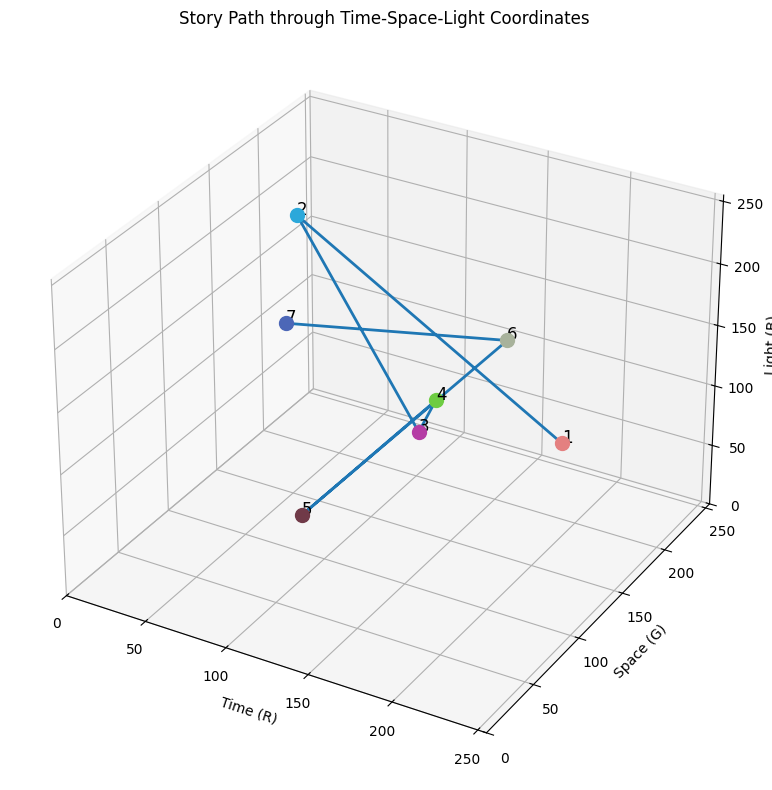

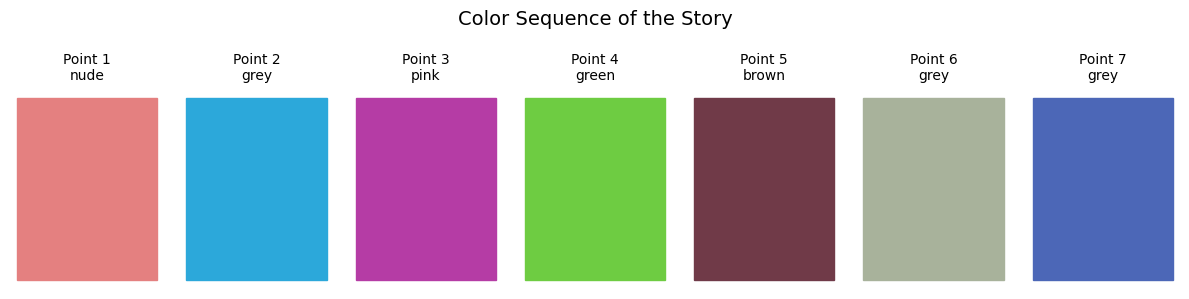

Generating story segments...


  0%|          | 0/7 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
100%|██████████| 7/7 [00:25<00:00,  3.65s/it]



# The Mislay of Approach

In a world of nude, fulfill, satisfy, fulfil, and love, and so does the love, love, and so does the law of love.
So, you see, you say, that, as the Lord said, “For, in his heart, I say, “For you say, in my heart, ‘for I believe in my heart, and in my heart, and in my heart, and in my heart, and in my heart, and in my

In a world of grey, precary, reverential, misplace, and a lack of understanding of the world, we can understand the difference between the two in the most extreme situations. And if we wish for the best in our ability to find the time to be present and to work in harmony and harmony then we will be in favour." I will argue that the importance of the role of the world of fair and nurturing is crucial. At the same time, we are in the position for

In a world of pink, exquisite, recherche, and, sadly, an ugly world.

In a world of green, bulb-shaped, grow, turn, and even create








































































In [4]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from transformers import pipeline
import random
from tqdm import tqdm
import time

# Install required packages
!pip install transformers tqdm matplotlib pandas numpy

# URL for the semantic mapping CSV
semantic_mapping_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-2v6aXttOyFqBybhwkaJAvTajtkUwLk.csv"

class TimeSpaceLightStoryteller:
    def __init__(self):
        self.semantic_df = None
        self.story_points = []
        self.story_text = ""
        self.story_generator = None

    def fetch_semantic_data(self, url):
        """Fetch the semantic mapping data from the provided URL"""
        print("Fetching semantic mapping data...")
        response = requests.get(url)
        if response.status_code == 200:
            self.semantic_df = pd.read_csv(StringIO(response.text))
            # Convert RGB columns to numeric
            for col in ['R', 'G', 'B']:
                self.semantic_df[col] = pd.to_numeric(self.semantic_df[col], errors='coerce')
            print(f"Loaded semantic data with {len(self.semantic_df)} entries")
            return True
        else:
            print(f"Failed to fetch data: {response.status_code}")
            return False

    def initialize_story_generator(self):
        """Initialize the story generator using a free LLM from Hugging Face"""
        print("Initializing story generator...")
        try:
            # Using a small model that can run locally
            self.story_generator = pipeline('text-generation', model='distilgpt2')
            print("Story generator initialized successfully")
            return True
        except Exception as e:
            print(f"Error initializing story generator: {e}")
            # Fallback to a simpler approach if the model fails to load
            self.story_generator = None
            print("Using fallback story generation method")
            return False

    def find_semantic_meaning(self, r, g, b):
        """Find the closest semantic meaning for the given RGB coordinates"""
        if self.semantic_df is None:
            print("Semantic data not loaded. Please fetch data first.")
            return None

        # Calculate Euclidean distance in RGB space
        distances = np.sqrt(
            (self.semantic_df['R'] - r)**2 +
            (self.semantic_df['G'] - g)**2 +
            (self.semantic_df['B'] - b)**2
        )

        # Find the index of the minimum distance
        closest_idx = distances.idxmin()
        closest_row = self.semantic_df.iloc[closest_idx]

        return {
            'rgb': (r, g, b),
            'closest_color': closest_row['Closest Color'],
            'distance': distances[closest_idx],
            'original_words': closest_row['Original Words'] if pd.notna(closest_row['Original Words']) else "",
            'new_words': closest_row['New Words'] if pd.notna(closest_row['New Words']) else ""
        }

    def generate_story_path(self, num_points=5, method='random'):
        """Generate a path through RGB space to form our story"""
        print(f"Generating story path with {num_points} points using {method} method...")

        if method == 'random':
            # Generate random points in RGB space
            points = []
            for _ in range(num_points):
                r = random.randint(0, 255)
                g = random.randint(0, 255)
                b = random.randint(0, 255)
                points.append((r, g, b))

        elif method == 'gradient':
            # Generate a gradient path from one point to another
            start = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            end = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

            points = []
            for i in range(num_points):
                t = i / (num_points - 1) if num_points > 1 else 0
                r = int(start[0] + t * (end[0] - start[0]))
                g = int(start[1] + t * (end[1] - start[1]))
                b = int(start[2] + t * (end[2] - start[2]))
                points.append((r, g, b))

        elif method == 'spiral':
            # Generate a spiral path through RGB space
            center = (128, 128, 128)
            radius = 100
            points = []

            for i in range(num_points):
                angle = (i / num_points) * 2 * np.pi * 3  # 3 full rotations
                radius_i = radius * (1 - i / (2 * num_points))

                r = int(center[0] + radius_i * np.cos(angle))
                g = int(center[1] + radius_i * np.sin(angle))
                b = int(center[2] + radius_i * np.sin(angle * 0.5))

                # Ensure values are within RGB range
                r = max(0, min(255, r))
                g = max(0, min(255, g))
                b = max(0, min(255, b))

                points.append((r, g, b))

        # Find semantic meanings for each point
        self.story_points = []
        for r, g, b in points:
            semantic = self.find_semantic_meaning(r, g, b)
            if semantic:
                self.story_points.append(semantic)

        print(f"Generated {len(self.story_points)} story points")
        return self.story_points

    def generate_story_segment(self, semantic_point, max_length=100):
        """Generate a story segment based on semantic meanings"""
        # Get the words to use as inspiration
        words = []
        if semantic_point['original_words']:
            words.extend([w.strip() for w in semantic_point['original_words'].split(',')])
        if semantic_point['new_words']:
            words.extend([w.strip() for w in semantic_point['new_words'].split(',')])

        # Filter out empty strings and select up to 3 random words
        words = [w for w in words if w]
        if words:
            selected_words = random.sample(words, min(3, len(words)))
            prompt = f"In a world of {semantic_point['closest_color']}, {', '.join(selected_words)},"
        else:
            prompt = f"In a world of {semantic_point['closest_color']},"

        # Generate text using the LLM
        if self.story_generator:
            try:
                result = self.story_generator(prompt, max_length=max_length, num_return_sequences=1)
                return result[0]['generated_text']
            except Exception as e:
                print(f"Error generating story segment: {e}")
                # Fallback method
                return self._fallback_generation(prompt)
        else:
            # Use fallback method if no generator is available
            return self._fallback_generation(prompt)

    def _fallback_generation(self, prompt):
        """Fallback method for story generation when the LLM is not available"""
        color = prompt.split('world of ')[1].split(',')[0]
        words = prompt.split(',')[1:] if ',' in prompt else []

        templates = [
            f"The {color} light revealed a scene of {' and '.join(words)}.",
            f"As time passed, the {color} glow intensified, bringing thoughts of {' and '.join(words)}.",
            f"In the distance, a {color} horizon promised {' and '.join(words)}.",
            f"The space filled with {color} energy, transforming everything into {' and '.join(words)}.",
            f"A {color} mist descended, carrying whispers of {' and '.join(words)}."
        ]

        return random.choice(templates)

    def create_complete_story(self):
        """Create a complete story from the generated segments"""
        if not self.story_points:
            print("No story points available. Please generate a story path first.")
            return ""

        print("Generating story segments...")
        segments = []

        for point in tqdm(self.story_points):
            segment = self.generate_story_segment(point)
            segments.append(segment)
            # Add a small delay to avoid rate limiting if using an API
            time.sleep(0.5)

        # Combine segments into a coherent story
        self.story_text = "\n\n".join(segments)

        # Add a title based on the semantic meanings
        all_words = []
        for point in self.story_points:
            if point['original_words']:
                all_words.extend([w.strip() for w in point['original_words'].split(',')])
            if point['new_words']:
                all_words.extend([w.strip() for w in point['new_words'].split(',')])

        # Filter and select words for the title
        all_words = [w for w in all_words if w and len(w) > 3]
        if all_words:
            selected_words = random.sample(all_words, min(2, len(all_words)))
            title = f"The {selected_words[0].title()} of {selected_words[-1].title()}"
        else:
            colors = [point['closest_color'] for point in self.story_points]
            title = f"Journey Through {colors[0].title()} and {colors[-1].title()}"

        self.story_text = f"# {title}\n\n{self.story_text}"
        return self.story_text

    def visualize_story_path(self):
        """Visualize the story path in 3D RGB space"""
        if not self.story_points:
            print("No story points available. Please generate a story path first.")
            return

        # Extract RGB values
        rgb_values = [point['rgb'] for point in self.story_points]
        r_values, g_values, b_values = zip(*rgb_values)

        # Create 3D plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the path
        ax.plot(r_values, g_values, b_values, 'o-', linewidth=2, markersize=8)

        # Add color to each point
        for i, (r, g, b) in enumerate(rgb_values):
            ax.scatter(r, g, b, color=[r/255, g/255, b/255], s=100)
            ax.text(r, g, b, f"{i+1}", fontsize=12)

        # Set labels and title
        ax.set_xlabel('Time (R)')
        ax.set_ylabel('Space (G)')
        ax.set_zlabel('Light (B)')
        ax.set_title('Story Path through Time-Space-Light Coordinates')

        # Set axis limits
        ax.set_xlim(0, 255)
        ax.set_ylim(0, 255)
        ax.set_zlim(0, 255)

        plt.tight_layout()
        plt.show()

        # Also create a 2D visualization of the color sequence
        plt.figure(figsize=(12, 3))
        for i, (r, g, b) in enumerate(rgb_values):
            plt.subplot(1, len(rgb_values), i + 1)
            plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=[r/255, g/255, b/255])
            plt.axis('off')
            plt.title(f"Point {i+1}\n{self.story_points[i]['closest_color']}", fontsize=10)

        plt.suptitle("Color Sequence of the Story", fontsize=14)
        plt.tight_layout()
        plt.show()

# Main execution
def main():
    storyteller = TimeSpaceLightStoryteller()

    # Fetch semantic data
    if not storyteller.fetch_semantic_data(semantic_mapping_url):
        print("Failed to fetch semantic data. Exiting.")
        return

    # Initialize story generator
    storyteller.initialize_story_generator()

    # Generate story path
    # Options for method: 'random', 'gradient', 'spiral'
    storyteller.generate_story_path(num_points=7, method='spiral')

    # Visualize the path
    storyteller.visualize_story_path()

    # Create the story
    story = storyteller.create_complete_story()

    # Print the story
    print("\n" + "="*50 + "\n")
    print(story)
    print("\n" + "="*50 + "\n")

    # Print information about the story points
    print("Story Points Information:")
    for i, point in enumerate(storyteller.story_points):
        print(f"\nPoint {i+1}:")
        print(f"  RGB: {point['rgb']}")
        print(f"  Color: {point['closest_color']}")
        print(f"  Original Words: {point['original_words']}")
        print(f"  New Words: {point['new_words']}")

if __name__ == "__main__":
    main()

In [6]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from transformers import pipeline
import random
from tqdm import tqdm
import time
import re
from collections import Counter
import ipywidgets as widgets
from IPython.display import display, clear_output

# Install required packages
!pip install transformers tqdm matplotlib pandas numpy scikit-learn ipywidgets

# URL for the semantic mapping CSV
semantic_mapping_url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/semantic_rgb_mapping-2v6aXttOyFqBybhwkaJAvTajtkUwLk.csv"

class TimeSpaceLightStoryteller:
    def __init__(self):
        self.semantic_df = None
        self.story_points = []
        self.story_text = ""
        self.story_generator = None
        self.word_to_rgb_map = {}
        self.sentiment_analyzer = None
        self.all_semantic_words = set()
        self.use_nltk = False

        # Try to import NLTK, but don't fail if it's not available
        try:
            import nltk
            from nltk.tokenize import word_tokenize
            from nltk.corpus import stopwords
            from nltk.stem import WordNetLemmatizer

            # Download necessary NLTK data with error handling
            try:
                nltk.download('punkt', quiet=True)
                nltk.download('stopwords', quiet=True)
                nltk.download('wordnet', quiet=True)

                self.lemmatizer = WordNetLemmatizer()
                self.stop_words = set(stopwords.words('english'))
                self.word_tokenize = word_tokenize
                self.use_nltk = True
                print("NLTK initialized successfully")
            except Exception as e:
                print(f"NLTK data download failed: {e}. Using fallback tokenization.")
                self.use_nltk = False
        except ImportError:
            print("NLTK not available. Using fallback tokenization.")
            self.use_nltk = False

    def fetch_semantic_data(self, url):
        """Fetch the semantic mapping data from the provided URL"""
        print("Fetching semantic mapping data...")
        try:
            response = requests.get(url)
            if response.status_code == 200:
                self.semantic_df = pd.read_csv(StringIO(response.text))
                # Convert RGB columns to numeric
                for col in ['R', 'G', 'B']:
                    self.semantic_df[col] = pd.to_numeric(self.semantic_df[col], errors='coerce')
                print(f"Loaded semantic data with {len(self.semantic_df)} entries")

                # Build word to RGB mapping for faster lookups
                self._build_word_to_rgb_map()

                return True
            else:
                print(f"Failed to fetch data: {response.status_code}")
                return False
        except Exception as e:
            print(f"Error fetching data: {e}")
            return False

    def _build_word_to_rgb_map(self):
        """Build a mapping from words to RGB values for efficient lookup"""
        self.word_to_rgb_map = {}
        self.all_semantic_words = set()

        for _, row in self.semantic_df.iterrows():
            rgb = (row['R'], row['G'], row['B'])

            # Process original words
            if pd.notna(row['Original Words']):
                words = [w.strip().lower() for w in str(row['Original Words']).split(',')]
                for word in words:
                    if word:
                        self.word_to_rgb_map[word] = rgb
                        self.all_semantic_words.add(word)

            # Process new words
            if pd.notna(row['New Words']):
                words = [w.strip().lower() for w in str(row['New Words']).split(',')]
                for word in words:
                    if word:
                        self.word_to_rgb_map[word] = rgb
                        self.all_semantic_words.add(word)

        print(f"Built word-to-RGB map with {len(self.word_to_rgb_map)} entries")

    def initialize_story_generator(self):
        """Initialize the story generator and sentiment analyzer"""
        print("Initializing story generator...")
        try:
            # Using a small model that can run locally
            self.story_generator = pipeline('text-generation', model='distilgpt2')
            print("Story generator initialized successfully")

            # Try to initialize sentiment analyzer, but don't fail if it doesn't work
            try:
                self.sentiment_analyzer = pipeline('sentiment-analysis')
                print("Sentiment analyzer initialized successfully")
            except Exception as e:
                print(f"Sentiment analyzer initialization failed: {e}. Using fallback sentiment analysis.")
                self.sentiment_analyzer = None

            return True
        except Exception as e:
            print(f"Error initializing models: {e}")
            # Fallback to a simpler approach if the models fail to load
            self.story_generator = None
            self.sentiment_analyzer = None
            print("Using fallback generation methods")
            return False

    def find_semantic_meaning(self, r, g, b):
        """Find the closest semantic meaning for the given RGB coordinates"""
        if self.semantic_df is None:
            print("Semantic data not loaded. Please fetch data first.")
            return None

        # Calculate Euclidean distance in RGB space
        distances = np.sqrt(
            (self.semantic_df['R'] - r)**2 +
            (self.semantic_df['G'] - g)**2 +
            (self.semantic_df['B'] - b)**2
        )

        # Find the index of the minimum distance
        closest_idx = distances.idxmin()
        closest_row = self.semantic_df.iloc[closest_idx]

        return {
            'rgb': (r, g, b),
            'closest_color': closest_row['Closest Color'],
            'distance': distances[closest_idx],
            'original_words': closest_row['Original Words'] if pd.notna(closest_row['Original Words']) else "",
            'new_words': closest_row['New Words'] if pd.notna(closest_row['New Words']) else ""
        }

    def preprocess_text(self, text):
        """Preprocess text by tokenizing, removing stopwords, and lemmatizing"""
        if self.use_nltk:
            # Use NLTK for preprocessing
            try:
                # Tokenize
                tokens = self.word_tokenize(text.lower())

                # Remove stopwords and non-alphabetic tokens
                filtered_tokens = [token for token in tokens if token.isalpha() and token not in self.stop_words]

                # Lemmatize
                lemmatized_tokens = [self.lemmatizer.lemmatize(token) for token in filtered_tokens]

                return lemmatized_tokens
            except Exception as e:
                print(f"NLTK preprocessing failed: {e}. Using fallback preprocessing.")
                # Fall through to the fallback method

        # Fallback simple preprocessing
        # Remove punctuation and convert to lowercase
        text = re.sub(r'[^\w\s]', '', text.lower())

        # Split into words
        words = text.split()

        # Simple stopwords list
        simple_stopwords = {'a', 'an', 'the', 'and', 'or', 'but', 'if', 'then', 'else', 'when',
                           'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                           'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
                           'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
                           'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
                           'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
                           'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
                           'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
                           'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
                           'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma',
                           'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won',
                           'wouldn', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
                           'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
                           'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
                           'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who',
                           'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
                           'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',
                           'does', 'did', 'doing'}

        # Filter out stopwords
        filtered_words = [word for word in words if word not in simple_stopwords and len(word) > 1]

        return filtered_words

    def analyze_phrase(self, phrase):
        """Analyze a user phrase to extract key concepts and sentiment"""
        # Preprocess the phrase
        tokens = self.preprocess_text(phrase)

        # Count token frequency
        token_counts = Counter(tokens)

        # Simple sentiment analysis if the analyzer is not available
        sentiment = "neutral"
        sentiment_score = 0.5

        if self.sentiment_analyzer:
            try:
                result = self.sentiment_analyzer(phrase)
                sentiment = result[0]['label']
                sentiment_score = result[0]['score']
            except Exception as e:
                print(f"Error analyzing sentiment: {e}. Using fallback sentiment analysis.")
                # Fall through to fallback sentiment analysis

        # Fallback sentiment analysis
        if sentiment == "neutral":
            # Simple keyword-based sentiment analysis
            positive_words = {'love', 'happy', 'joy', 'good', 'great', 'excellent', 'wonderful',
                             'amazing', 'fantastic', 'beautiful', 'nice', 'best', 'better',
                             'awesome', 'positive', 'success', 'successful', 'win', 'winning'}

            negative_words = {'hate', 'sad', 'unhappy', 'bad', 'terrible', 'awful', 'horrible',
                             'worst', 'worse', 'negative', 'fail', 'failure', 'lose', 'losing',
                             'lost', 'difficult', 'hard', 'trouble', 'problem', 'worry', 'worried',
                             'fear', 'afraid', 'scary', 'angry', 'mad', 'upset', 'hurt', 'pain',
                             'painful', 'sick', 'ill', 'disease', 'death', 'dead', 'dying', 'cry',
                             'crying', 'tears', 'alone', 'lonely', 'abandoned', 'reject', 'rejected'}

            # Count positive and negative words
            pos_count = sum(1 for token in tokens if token.lower() in positive_words)
            neg_count = sum(1 for token in tokens if token.lower() in negative_words)

            if pos_count > neg_count:
                sentiment = "POSITIVE"
                sentiment_score = min(0.9, 0.5 + (pos_count - neg_count) * 0.1)
            elif neg_count > pos_count:
                sentiment = "NEGATIVE"
                sentiment_score = min(0.9, 0.5 + (neg_count - pos_count) * 0.1)
            else:
                # Check for specific negative phrases
                if any(neg_phrase in phrase.lower() for neg_phrase in
                      ["doesn't love", "don't love", "not love", "no love",
                       "hate", "dislike", "abandon", "reject", "alone"]):
                    sentiment = "NEGATIVE"
                    sentiment_score = 0.7

        # Find similar words in our semantic dataset
        similar_words = []
        for token in tokens:
            if token in self.word_to_rgb_map:
                similar_words.append((token, 1.0))  # Exact match
            else:
                # Find similar words
                matches = self._find_similar_words(token, limit=3)
                similar_words.extend(matches)

        return {
            'tokens': tokens,
            'token_counts': token_counts,
            'sentiment': sentiment,
            'sentiment_score': sentiment_score,
            'similar_words': similar_words
        }

    def _find_similar_words(self, word, limit=3):
        """Find words in our semantic dataset that are similar to the given word"""
        if not self.all_semantic_words:
            return []

        # Simple character-based similarity
        word_scores = []
        for semantic_word in self.all_semantic_words:
            # Skip very short words
            if len(semantic_word) < 3:
                continue

            # Character overlap score
            word_chars = set(word)
            semantic_chars = set(semantic_word)
            if not word_chars or not semantic_chars:
                continue

            overlap_score = len(word_chars.intersection(semantic_chars)) / len(word_chars.union(semantic_chars))

            # Prefix matching
            prefix_len = 0
            for i in range(min(len(word), len(semantic_word))):
                if word[i] == semantic_word[i]:
                    prefix_len += 1
                else:
                    break

            prefix_score = prefix_len / max(len(word), len(semantic_word))

            # Combined score
            combined_score = (overlap_score * 0.6) + (prefix_score * 0.4)

            if combined_score > 0.3:  # Threshold for similarity
                word_scores.append((semantic_word, combined_score))

        # Sort by score (descending)
        word_scores.sort(key=lambda x: x[1], reverse=True)

        # Return top matches
        return word_scores[:limit]

    def map_phrase_to_rgb_path(self, phrase, num_points=5):
        """Map a user phrase to a path through RGB space"""
        # Analyze the phrase
        analysis = self.analyze_phrase(phrase)

        print(f"Phrase analysis: {len(analysis['tokens'])} tokens, sentiment: {analysis['sentiment']}")

        # Start with a base path
        if analysis['sentiment'] == 'POSITIVE':
            # Bright, warm colors for positive sentiment
            base_start = (200, 180, 100)  # Warm yellow
            base_end = (150, 230, 180)    # Soft green
        elif analysis['sentiment'] == 'NEGATIVE':
            # Darker, cooler colors for negative sentiment
            base_start = (80, 100, 150)   # Cool blue
            base_end = (130, 50, 100)     # Dark purple
        else:
            # Neutral colors
            base_start = (150, 150, 150)  # Gray
            base_end = (180, 180, 200)    # Light blue-gray

        # Adjust the path based on the words in the phrase
        rgb_points = []

        # If we have similar words with RGB mappings, use them
        word_rgbs = []
        for word, score in analysis['similar_words']:
            if word in self.word_to_rgb_map:
                word_rgbs.append((self.word_to_rgb_map[word], score))

        if word_rgbs:
            # Use word RGB values, weighted by similarity score
            total_points = min(num_points, len(word_rgbs) + 2)  # +2 for start and end points

            # Add start point
            rgb_points.append(base_start)

            # Add points based on words, sorted by score
            sorted_word_rgbs = sorted(word_rgbs, key=lambda x: x[1], reverse=True)
            for (r, g, b), _ in sorted_word_rgbs[:total_points-2]:
                rgb_points.append((r, g, b))

            # Add end point
            rgb_points.append(base_end)

            # If we need more points, interpolate
            if len(rgb_points) < num_points:
                rgb_points = self._interpolate_points(rgb_points, num_points)
        else:
            # Generate a gradient path from start to end
            rgb_points = []
            for i in range(num_points):
                t = i / (num_points - 1) if num_points > 1 else 0
                r = int(base_start[0] + t * (base_end[0] - base_start[0]))
                g = int(base_start[1] + t * (base_end[1] - base_start[1]))
                b = int(base_start[2] + t * (base_end[2] - base_start[2]))
                rgb_points.append((r, g, b))

        # Ensure all RGB values are within range
        rgb_points = [(max(0, min(255, r)), max(0, min(255, g)), max(0, min(255, b)))
                      for r, g, b in rgb_points]

        # Find semantic meanings for each point
        self.story_points = []
        for r, g, b in rgb_points:
            semantic = self.find_semantic_meaning(r, g, b)
            if semantic:
                self.story_points.append(semantic)

        print(f"Generated {len(self.story_points)} story points based on the phrase")
        return self.story_points

    def _interpolate_points(self, points, target_count):
        """Interpolate between points to reach the target count"""
        if len(points) >= target_count:
            return points

        result = []
        for i in range(len(points) - 1):
            start = points[i]
            end = points[i + 1]

            # Calculate how many points to insert between start and end
            segment_count = max(2, int(target_count / (len(points) - 1)))

            for j in range(segment_count):
                t = j / (segment_count - 1) if segment_count > 1 else 0
                r = int(start[0] + t * (end[0] - start[0]))
                g = int(start[1] + t * (end[1] - start[1]))
                b = int(start[2] + t * (end[2] - start[2]))
                result.append((r, g, b))

        # Add the last point
        result.append(points[-1])

        # If we have too many points, sample evenly
        if len(result) > target_count:
            indices = np.linspace(0, len(result) - 1, target_count, dtype=int)
            result = [result[i] for i in indices]

        return result

    def generate_story_segment(self, semantic_point, phrase_context="", max_length=100):
        """Generate a story segment based on semantic meanings and phrase context"""
        # Get the words to use as inspiration
        words = []
        if semantic_point['original_words']:
            words.extend([w.strip() for w in semantic_point['original_words'].split(',')])
        if semantic_point['new_words']:
            words.extend([w.strip() for w in semantic_point['new_words'].split(',')])

        # Filter out empty strings and select up to 3 random words
        words = [w for w in words if w]
        if words:
            selected_words = random.sample(words, min(3, len(words)))
            if phrase_context:
                prompt = f"In response to '{phrase_context}', in a world of {semantic_point['closest_color']}, {', '.join(selected_words)},"
            else:
                prompt = f"In a world of {semantic_point['closest_color']}, {', '.join(selected_words)},"
        else:
            if phrase_context:
                prompt = f"In response to '{phrase_context}', in a world of {semantic_point['closest_color']},"
            else:
                prompt = f"In a world of {semantic_point['closest_color']},"

        # Generate text using the LLM
        if self.story_generator:
            try:
                result = self.story_generator(prompt, max_length=max_length, num_return_sequences=1)
                return result[0]['generated_text']
            except Exception as e:
                print(f"Error generating story segment: {e}")
                # Fallback method
                return self._fallback_generation(prompt, phrase_context)
        else:
            # Use fallback method if no generator is available
            return self._fallback_generation(prompt, phrase_context)

    def _fallback_generation(self, prompt, phrase_context=""):
        """Fallback method for story generation when the LLM is not available"""
        # Extract context and color from prompt
        color_match = re.search(r"world of (\w+)", prompt)
        color = color_match.group(1) if color_match else "unknown"

        words_match = re.search(r"world of \w+, (.*?),", prompt)
        words = words_match.group(1).split(', ') if words_match else []

        if not words:
            words = ["mystery", "journey", "discovery"]

        # Special templates for family-related phrases
        if "family" in phrase_context.lower() and "love" in phrase_context.lower():
            family_templates = [
                f"The {color} shadows surrounded me as I contemplated my place in the family. Sometimes the absence of expressed love feels like {' and '.join(words)}.",
                f"In the {color} light of dawn, I realized that love in families can be complex, often hidden beneath layers of {' and '.join(words)}.",
                f"The {color} mist reminded me of how family relationships can be clouded by {' and '.join(words)}, making it hard to see the love that might still be there.",
                f"As the {color} sky darkened, I thought about how families sometimes struggle to show love, leaving feelings of {' and '.join(words)} in their wake.",
                f"The {color} room felt empty, much like the space where family affection should be. Yet within that emptiness, there was still {' and '.join(words)}."
            ]
            return random.choice(family_templates)

        # General templates
        templates = [
            f"The {color} light revealed a scene of {' and '.join(words)}. {phrase_context} was becoming clearer now.",
            f"As time passed, the {color} glow intensified, bringing thoughts of {' and '.join(words)}. This reminded me of {phrase_context}.",
            f"In the distance, a {color} horizon promised {' and '.join(words)}. Perhaps this was the answer to {phrase_context}.",
            f"The space filled with {color} energy, transforming everything into {' and '.join(words)}. The connection to {phrase_context} was undeniable.",
            f"A {color} mist descended, carrying whispers of {' and '.join(words)}. It seemed to respond directly to {phrase_context}."
        ]

        return random.choice(templates)

    def create_complete_story(self, user_phrase=""):
        """Create a complete story from the generated segments"""
        if not self.story_points:
            print("No story points available. Please generate a story path first.")
            return ""

        print("Generating story segments...")
        segments = []

        for point in tqdm(self.story_points):
            segment = self.generate_story_segment(point, phrase_context=user_phrase)
            segments.append(segment)
            # Add a small delay to avoid rate limiting if using an API
            time.sleep(0.5)

        # Combine segments into a coherent story
        self.story_text = "\n\n".join(segments)

        # Add a title based on the user phrase and semantic meanings
        if user_phrase:
            # Use the user phrase in the title
            words = self.preprocess_text(user_phrase)
            if words:
                selected_words = [w.title() for w in words[:2]]
                title = f"The {' '.join(selected_words)} Journey"
            else:
                title = "A Journey of Discovery"
        else:
            # Use semantic words for the title
            all_words = []
            for point in self.story_points:
                if point['original_words']:
                    all_words.extend([w.strip() for w in point['original_words'].split(',')])
                if point['new_words']:
                    all_words.extend([w.strip() for w in point['new_words'].split(',')])

            # Filter and select words for the title
            all_words = [w for w in all_words if w and len(w) > 3]
            if all_words:
                selected_words = random.sample(all_words, min(2, len(all_words)))
                title = f"The {selected_words[0].title()} of {selected_words[-1].title()}"
            else:
                colors = [point['closest_color'] for point in self.story_points]
                title = f"Journey Through {colors[0].title()} and {colors[-1].title()}"

        self.story_text = f"# {title}\n\n{self.story_text}"
        return self.story_text

    def visualize_story_path(self):
        """Visualize the story path in 3D RGB space"""
        if not self.story_points:
            print("No story points available. Please generate a story path first.")
            return

        # Extract RGB values
        rgb_values = [point['rgb'] for point in self.story_points]
        r_values, g_values, b_values = zip(*rgb_values)

        # Create 3D plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the path
        ax.plot(r_values, g_values, b_values, 'o-', linewidth=2, markersize=8)

        # Add color to each point
        for i, (r, g, b) in enumerate(rgb_values):
            ax.scatter(r, g, b, color=[r/255, g/255, b/255], s=100)
            ax.text(r, g, b, f"{i+1}", fontsize=12)

        # Set labels and title
        ax.set_xlabel('Time (R)')
        ax.set_ylabel('Space (G)')
        ax.set_zlabel('Light (B)')
        ax.set_title('Story Path through Time-Space-Light Coordinates')

        # Set axis limits
        ax.set_xlim(0, 255)
        ax.set_ylim(0, 255)
        ax.set_zlim(0, 255)

        plt.tight_layout()
        plt.show()

        # Also create a 2D visualization of the color sequence
        plt.figure(figsize=(12, 3))
        for i, (r, g, b) in enumerate(rgb_values):
            plt.subplot(1, len(rgb_values), i + 1)
            plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=[r/255, g/255, b/255])
            plt.axis('off')
            plt.title(f"Point {i+1}\n{self.story_points[i]['closest_color']}", fontsize=10)

        plt.suptitle("Color Sequence of the Story", fontsize=14)
        plt.tight_layout()
        plt.show()

def create_interactive_dashboard():
    """Create an interactive dashboard for generating stories from phrases"""
    storyteller = TimeSpaceLightStoryteller()

    # Fetch semantic data
    if not storyteller.fetch_semantic_data(semantic_mapping_url):
        print("Failed to fetch semantic data. Exiting.")
        return

    # Initialize story generator
    storyteller.initialize_story_generator()

    # Create widgets
    phrase_input = widgets.Text(
        value='',
        placeholder='Enter a phrase (e.g., "journey to the stars", "lost in the forest")',
        description='Phrase:',
        layout=widgets.Layout(width='80%')
    )

    num_points_slider = widgets.IntSlider(
        value=5,
        min=3,
        max=10,
        step=1,
        description='Story Length:',
        tooltip='Number of story points to generate'
    )

    generate_button = widgets.Button(
        description='Generate Story',
        button_style='success',
        tooltip='Generate a story based on the phrase',
        icon='magic'
    )

    output = widgets.Output()

    # Function to handle button click
    def on_generate_button_clicked(b):
        with output:
            clear_output()
            phrase = phrase_input.value.strip()
            if not phrase:
                print("Please enter a phrase to generate a story.")
                return

            print(f"Generating story for phrase: '{phrase}'")

            # Map phrase to RGB path
            storyteller.map_phrase_to_rgb_path(phrase, num_points=num_points_slider.value)

            # Visualize the path
            storyteller.visualize_story_path()

            # Create the story
            story = storyteller.create_complete_story(user_phrase=phrase)

            # Print the story
            print("\n" + "="*50 + "\n")
            print(story)
            print("\n" + "="*50 + "\n")

            # Print information about the story points
            print("Story Points Information:")
            for i, point in enumerate(storyteller.story_points):
                print(f"\nPoint {i+1}:")
                print(f"  RGB: {point['rgb']} (Time-Space-Light Coordinates)")
                print(f"  Color: {point['closest_color']}")
                print(f"  Original Words: {point['original_words']}")
                print(f"  New Words: {point['new_words']}")

    generate_button.on_click(on_generate_button_clicked)

    # Layout the widgets
    header = widgets.HTML(value="<h1>Time-Space-Light Story Generator</h1><p>Enter a phrase to generate a conformal time-space-light color story</p>")

    controls = widgets.VBox([
        phrase_input,
        num_points_slider,
        generate_button
    ])

    # Display the dashboard
    display(header)
    display(controls)
    display(output)

# Main execution
if __name__ == "__main__":
    create_interactive_dashboard()

NLTK initialized successfully
Fetching semantic mapping data...
Loaded semantic data with 216 entries
Built word-to-RGB map with 205 entries
Initializing story generator...


Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Story generator initialized successfully


Device set to use cpu


Sentiment analyzer initialized successfully


HTML(value='<h1>Time-Space-Light Story Generator</h1><p>Enter a phrase to generate a conformal time-space-ligh…

Output()